# Relatório 

In [28]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import numpy as np
import random
from matplotlib.finance import candlestick_ochl
from matplotlib import style
from math import log, exp

style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Ativos

Quero analisar três ativos diferentes: cemig, usiminas e a embraer. Uma vez que foram escolhidos, começarei a estudá-los.

In [2]:
cemig_data = pd.read_csv('CMIG4.csv',delimiter=';')
usiminas_data = pd.read_csv('USIM5.csv', delimiter=';')
embraer_data = pd.read_csv('EMBR3.csv', delimiter=';')

## Cemig

In [10]:
cemig_normalizado = group_by_day(cemig_data)

### Últimos dias

In [11]:
#primeiro dia: 20080102, ultimo dia 20160512
cemig_normalizado.tail()

abertura  fechamento    maximo    minimo   negocios  \
datahora                                                          
2016-05-06  1.788421    1.806648  1.832581  1.773256   9.052282   
2016-05-09  1.822935    1.830980  1.834180  1.761300   9.447860   
2016-05-10  1.811562    1.785070  1.862529  1.801710   9.882162   
2016-05-11  1.871802    1.862529  1.900614  1.845300   9.560645   
2016-05-12  1.871802    1.856298  1.931521  1.864080  10.094315   

            quantidade_papeis  volume_financeiro  fechamento_anterior  \
datahora                                                                
2016-05-06          15.642959          17.452729             1.824549   
2016-05-09          15.635744          17.426037             1.806648   
2016-05-10          15.979626          17.812668             1.830980   
2016-05-11          15.804740          17.677674             1.785070   
2016-05-12          16.229038          18.129574             1.862529   

             retorno  subiu   dia   datahora       ema  ema_close       sma  \
datahora                                                                      
2016-05-06 -0.017901     -1  2049 2016-05-06  1.838616          1  1.853081   
2016-05-09  0.024332      1  2050 2016-05-09  1.832408          1  1.843996   
2016-05-10 -0.045910     -1  2051 2016-05-10  1.812568          1  1.818510   
2016-05-11  0.077458      1  2052 2016-05-11  1.826043          1  1.821955   
2016-05-12 -0.006231     -1  2053 2016-05-12  1.837376          1  1.828305   

            sma_close        rsi  rsi_close  
datahora                                     
2016-05-06          1  24.118724          1  
2016-05-09          1  22.242656          1  
2016-05-10          1  22.088905          1  
2016-05-11          1  37.405651         -1  
2016-05-12          1  37.879335         -1

### Visualizações

<p>Tirei log de praticamennte tudo, como foi sugerido.</p>
<p>No gráfico subidas e descidas, eu comparo se o preço de hoje subiu (valor 1), desceu (valor -1) ou não mudou (valor 0) em comparação com o valor anterior.</p>

#### Toda a série temporal:

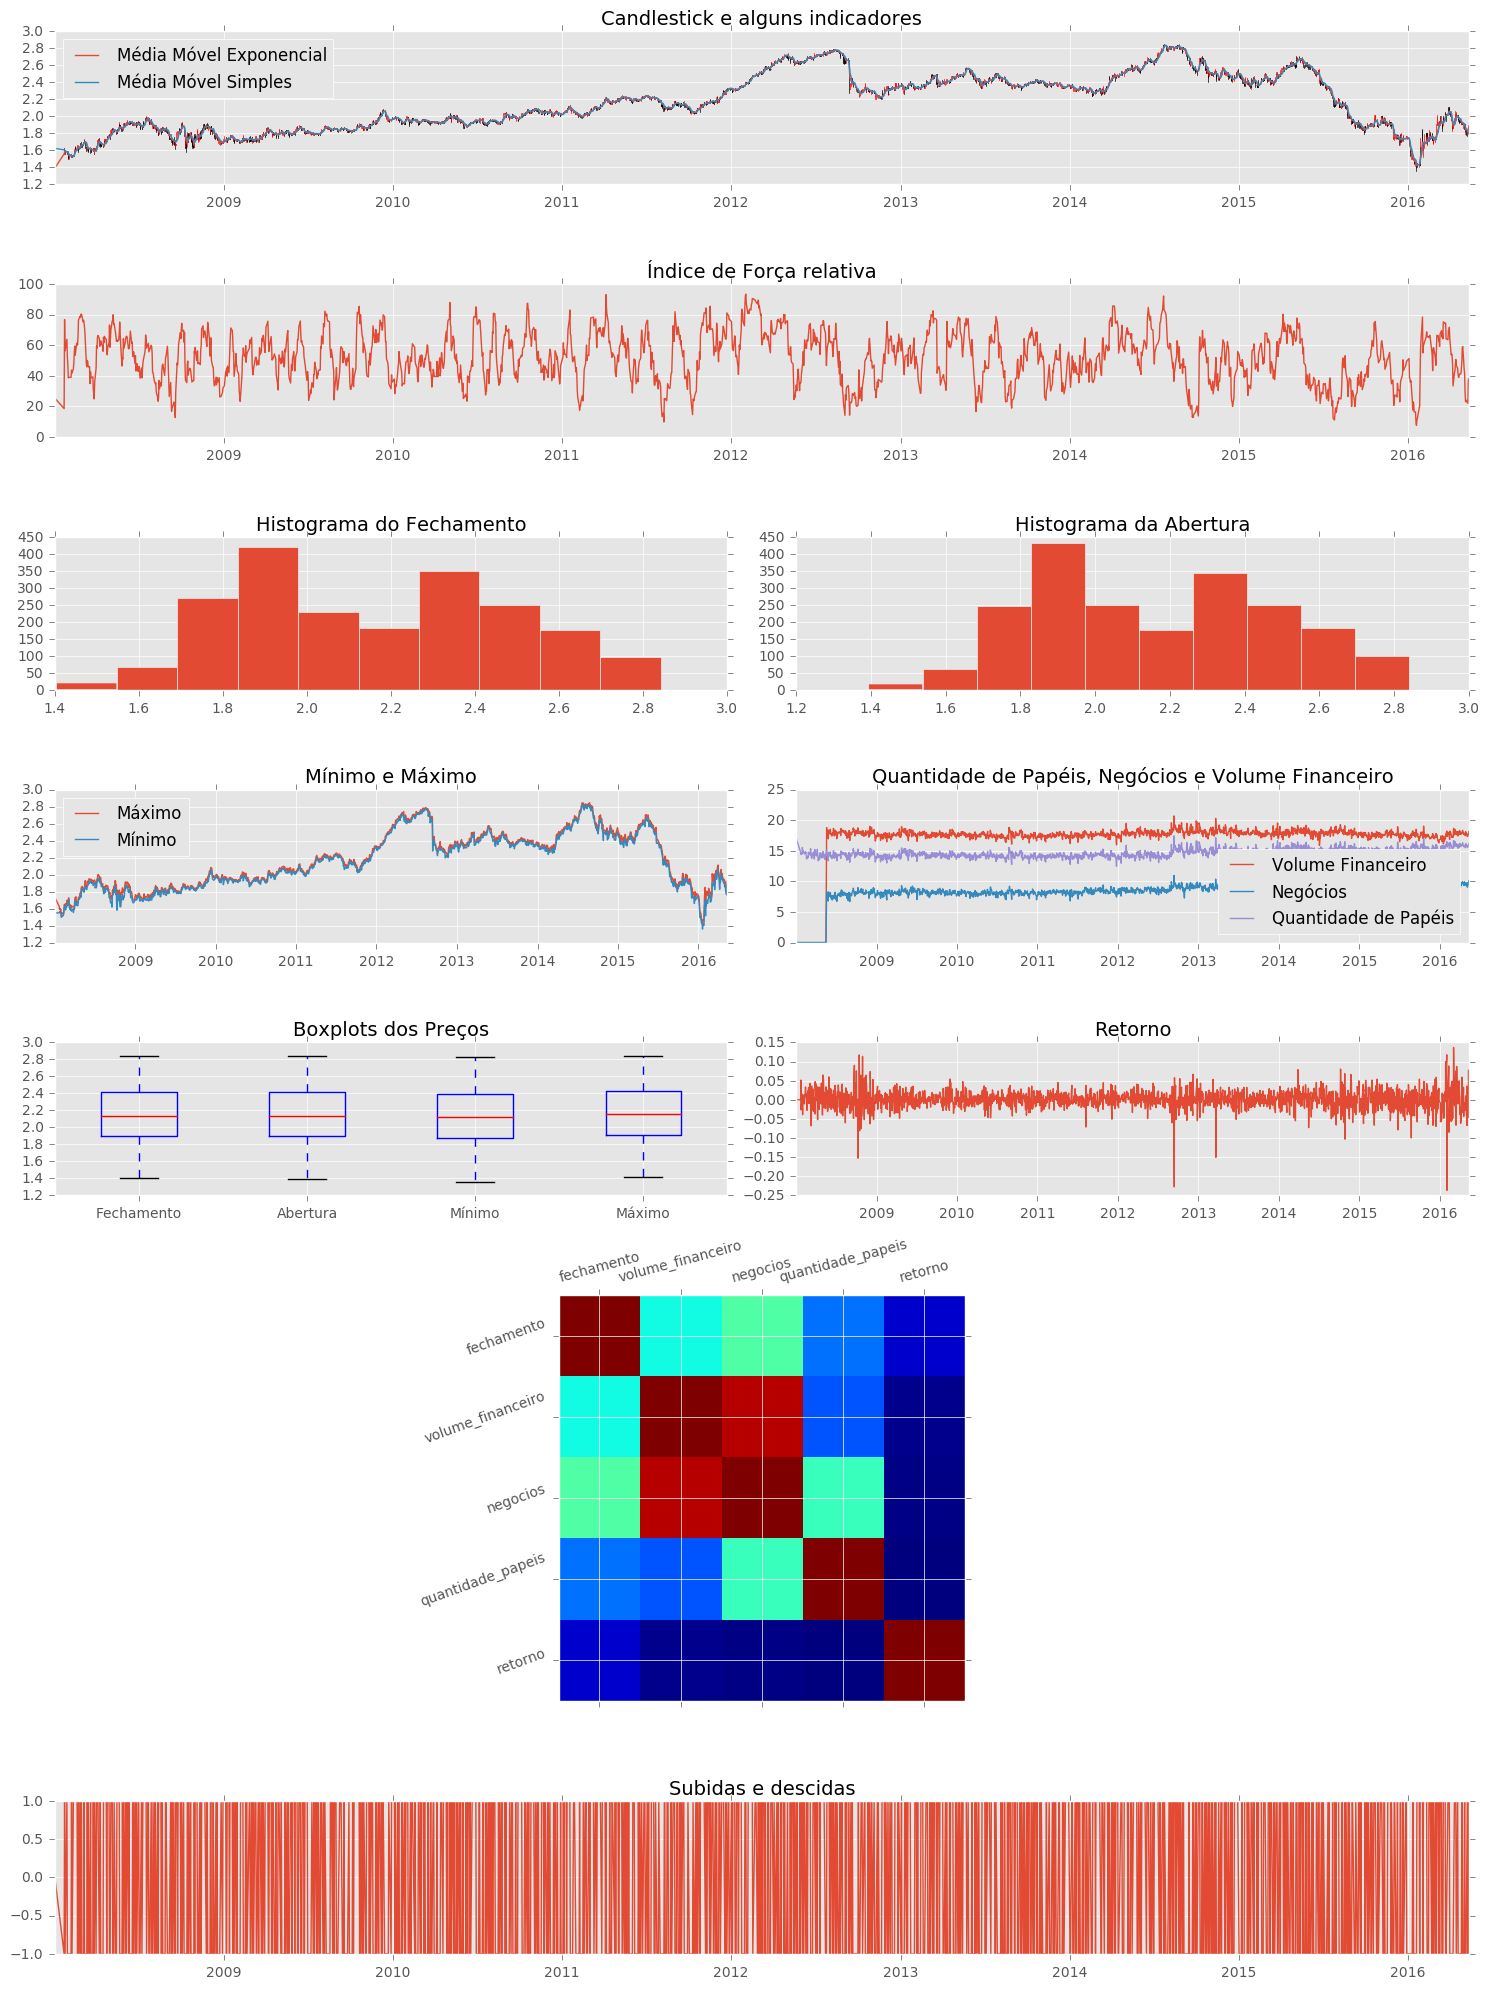

In [12]:
dataframe_visualizations(cemig_normalizado, '20080102','20160512')

#### Últimos 6 meses

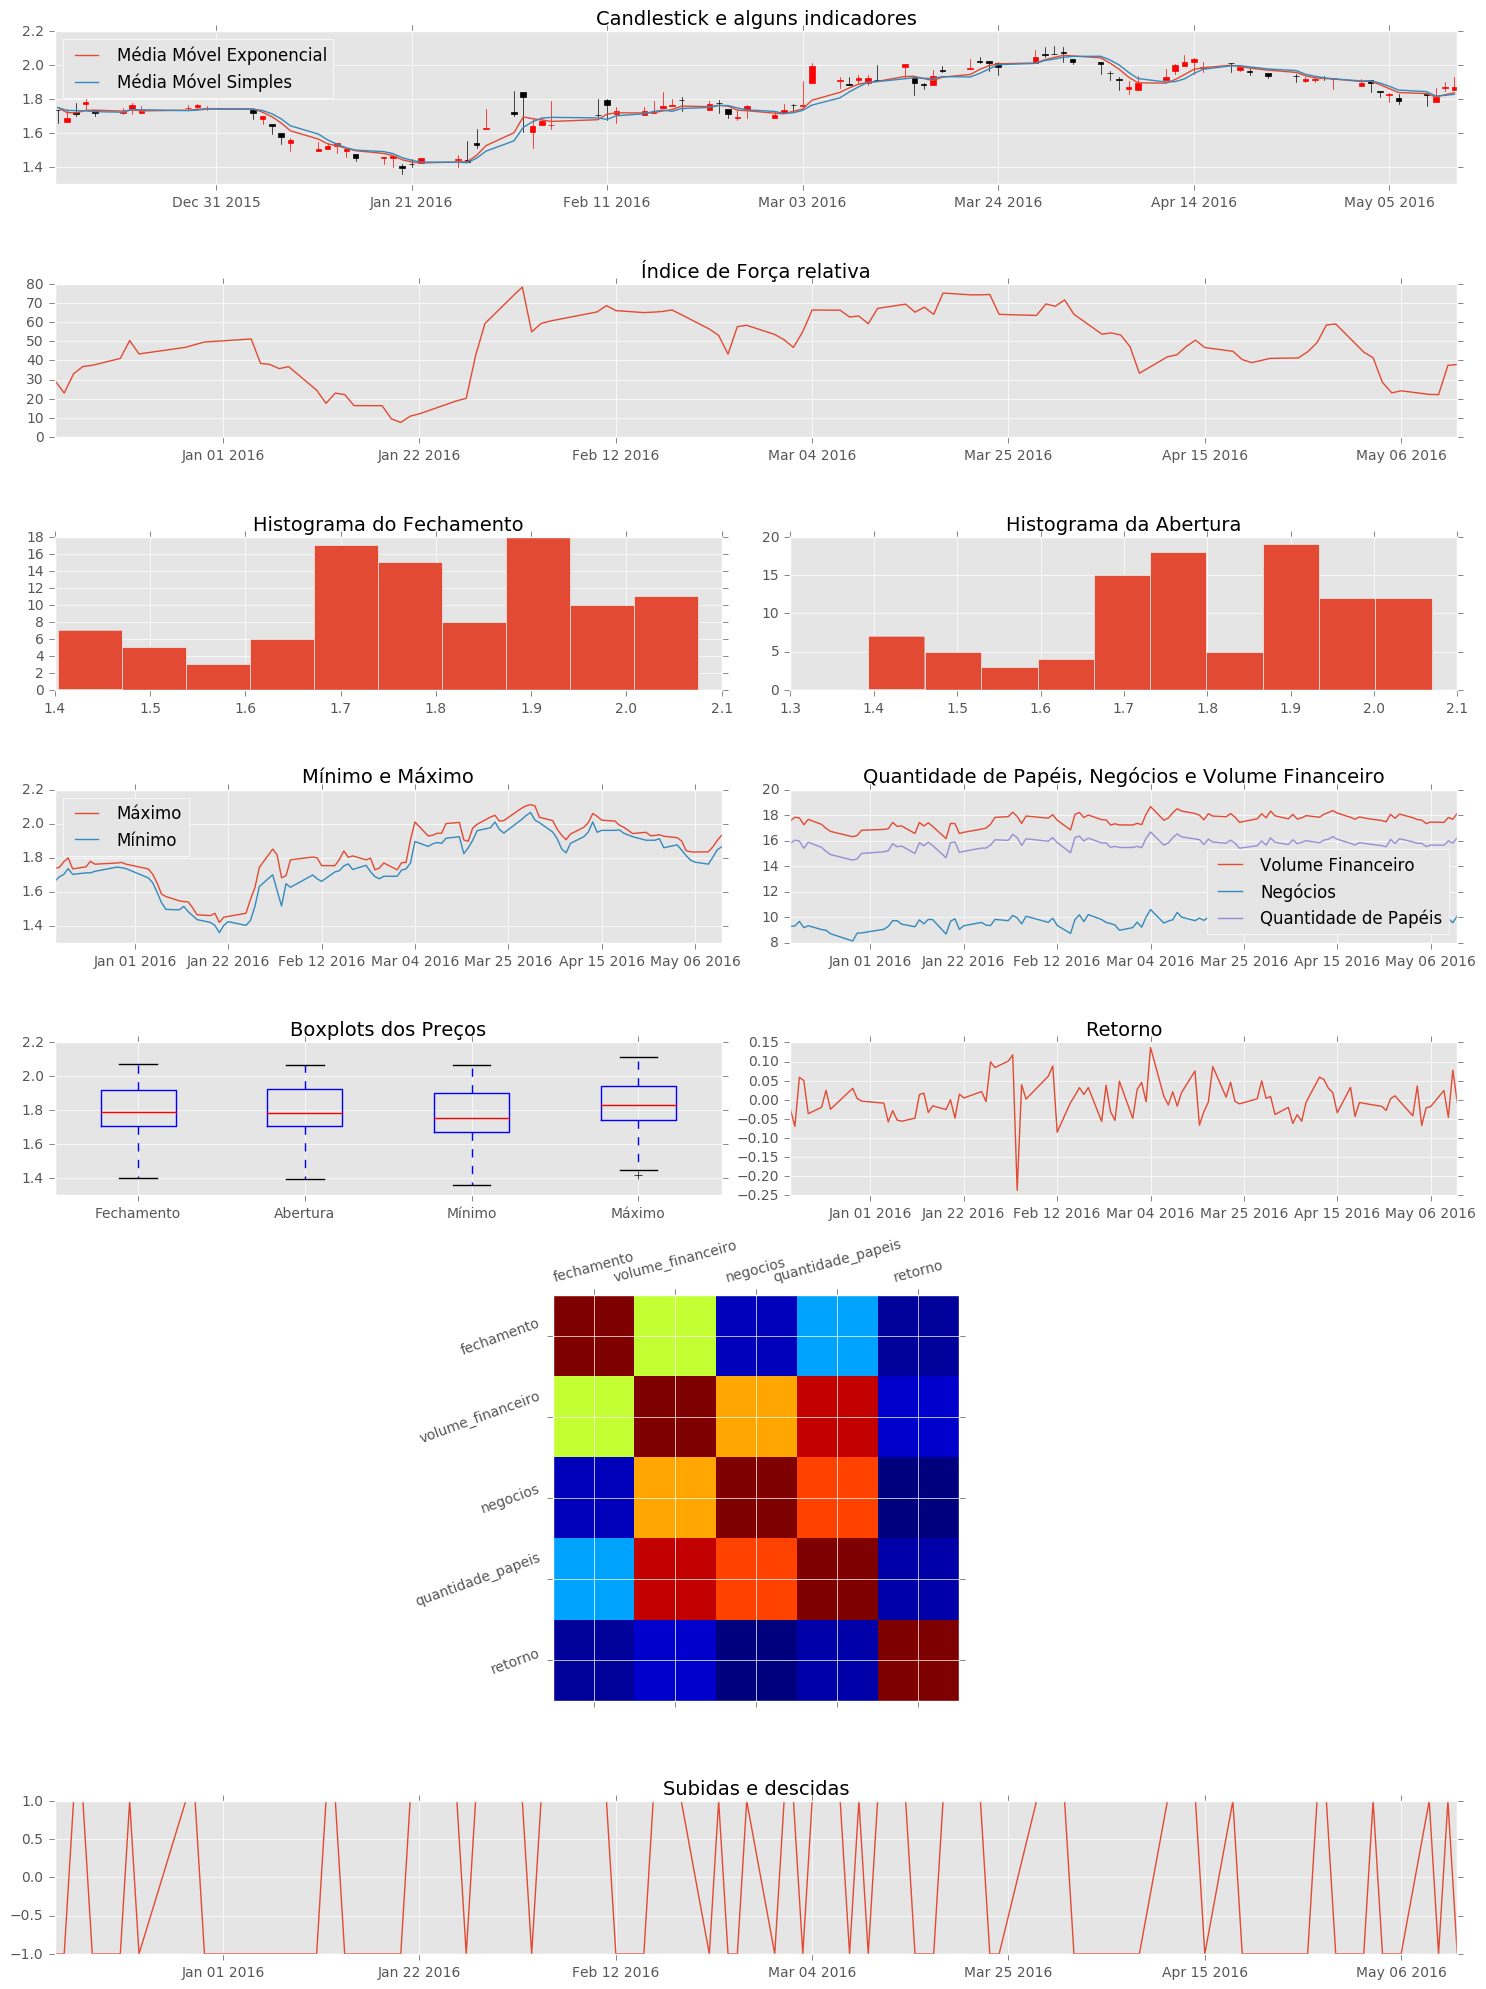

In [13]:
dataframe_visualizations(cemig_normalizado, '20151212','20160512')

## Embraer

In [14]:
embraer_normalizado = group_by_day(embraer_data)

### Últimos dias

In [15]:
embraer_normalizado.tail()

abertura  fechamento    maximo    minimo  negocios  \
datahora                                                         
2016-05-06  2.991222    2.991222  3.002708  2.952303  8.674539   
2016-05-09  2.950735    2.954910  2.990720  2.943386  9.369564   
2016-05-10  2.971440    2.971952  2.985177  2.954910  9.258178   
2016-05-11  2.989211    2.982647  2.997730  2.953868  9.051462   
2016-05-12  2.952825    2.956472  2.968875  2.931194  9.176680   

            quantidade_papeis  volume_financeiro  fechamento_anterior  \
datahora                                                                
2016-05-06          14.692229          17.658053             3.002211   
2016-05-09          15.023127          17.991705             2.991222   
2016-05-10          14.938490          17.914349             2.954910   
2016-05-11          14.424841          17.391690             2.971952   
2016-05-12          14.787652          17.733056             2.982647   

             retorno  subiu   dia   datahora       ema  ema_close       sma  \
datahora                                                                      
2016-05-06 -0.010989     -1  2049 2016-05-06  2.999880          1  3.000808   
2016-05-09 -0.036312     -1  2050 2016-05-09  2.983891          1  2.991050   
2016-05-10  0.017041      1  2051 2016-05-10  2.977638          1  2.984700   
2016-05-11  0.010695      1  2052 2016-05-11  2.977637          1  2.980588   
2016-05-12 -0.026175     -1  2053 2016-05-12  2.969503          1  2.971441   

            sma_close        rsi  rsi_close  
datahora                                     
2016-05-06          1  24.958342          1  
2016-05-09          1  13.237161          1  
2016-05-10          1  20.146915          1  
2016-05-11          1  26.598385          1  
2016-05-12          1  22.685221          1

### Visualizações

#### Toda a série temporal

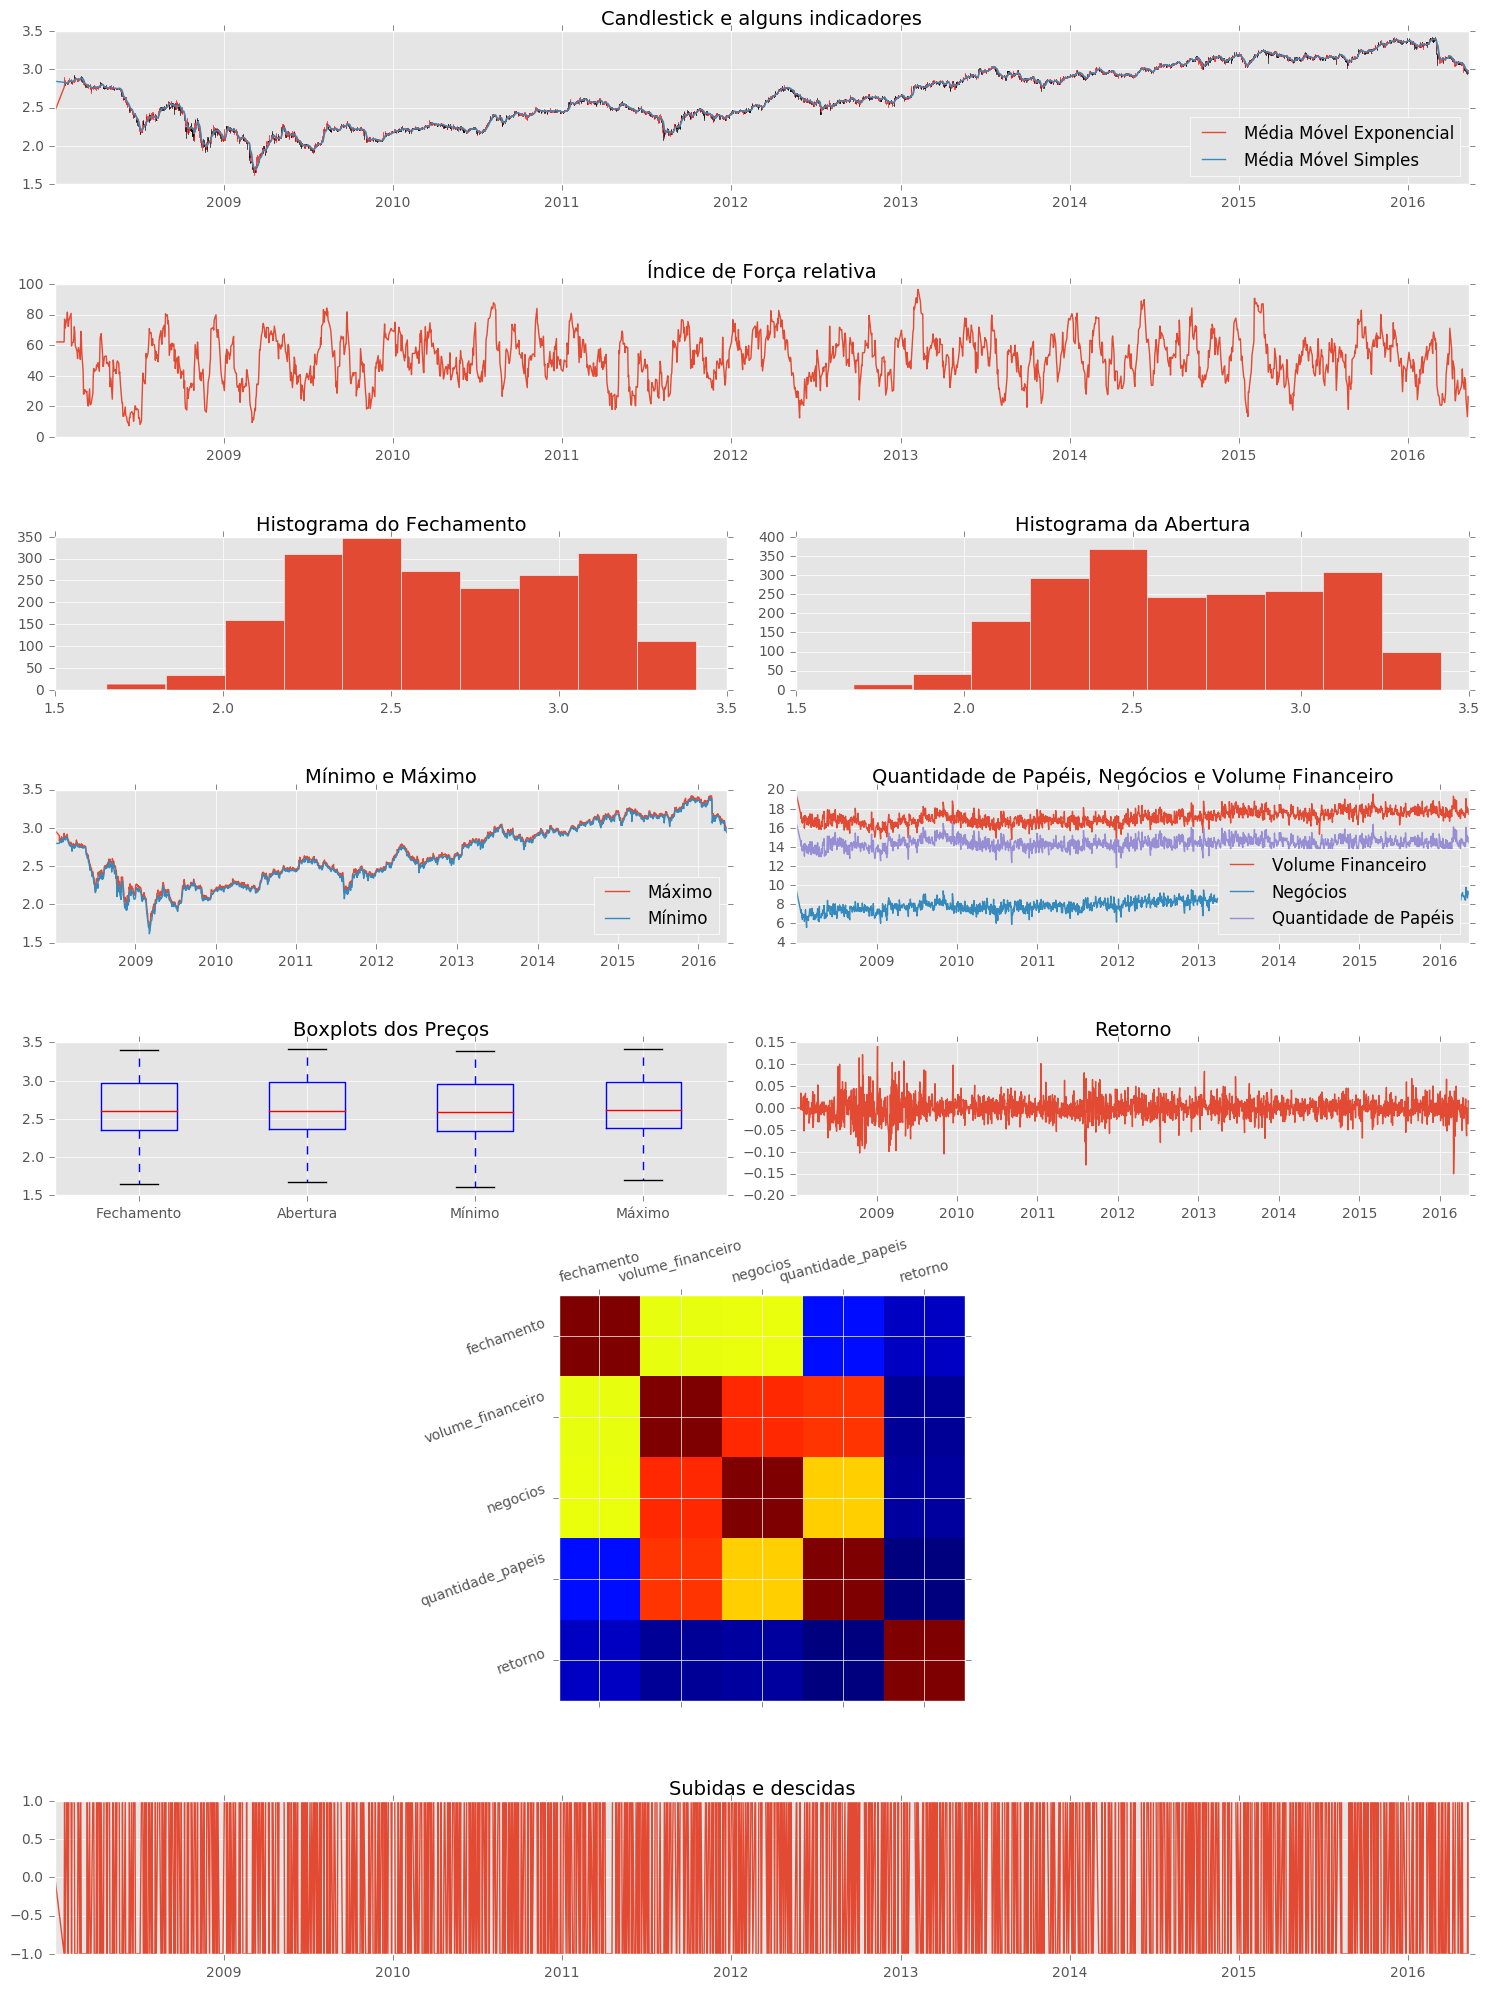

In [16]:
dataframe_visualizations(embraer_normalizado, '20080102','20160512')

#### Últimos 6 meses

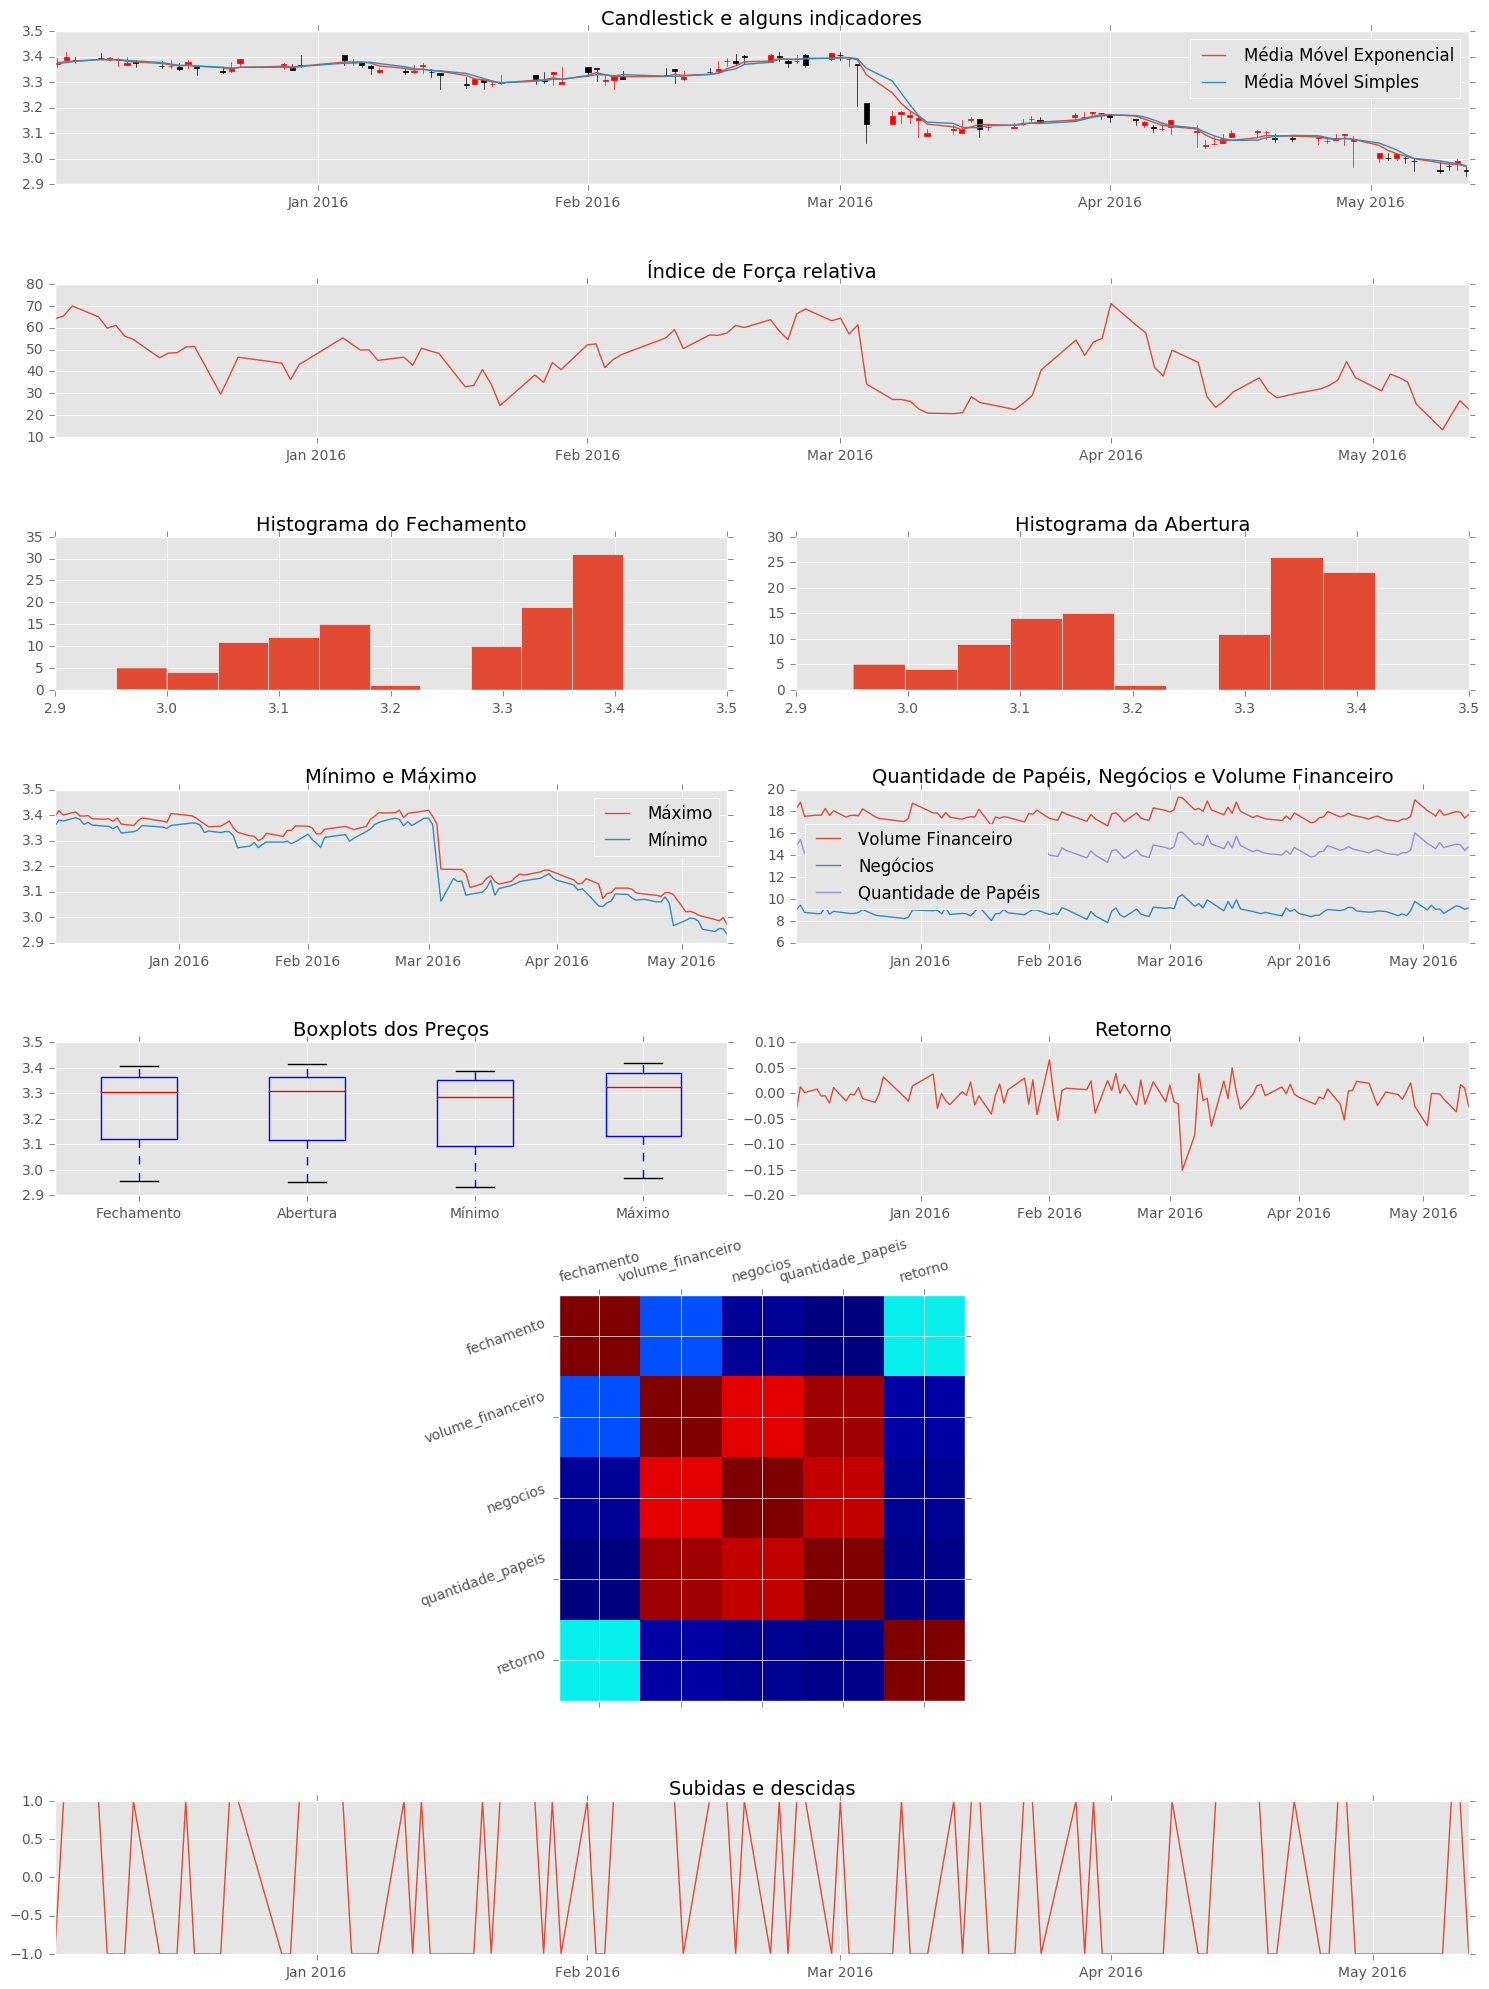

In [17]:
dataframe_visualizations(embraer_normalizado, '20151202','20160512')

## Usiminas

In [18]:
usiminas_normalizado = group_by_day(usiminas_data)

#### Últimos dias

In [19]:
usiminas_normalizado.tail()

abertura  fechamento    maximo    minimo  negocios  \
datahora                                                         
2016-05-06  0.824175    0.845868  0.879627  0.824175  9.169310   
2016-05-09  0.806476    0.845868  0.819780  0.703098  9.494842   
2016-05-10  0.797507    0.765468  0.858662  0.783902  9.514437   
2016-05-11  0.875469    0.858662  0.900161  0.841567  9.359450   
2016-05-12  0.879627    0.858662  0.896088  0.824175  9.188708   

            quantidade_papeis  volume_financeiro  fechamento_anterior  \
datahora                                                                
2016-05-06          17.088522          17.936604             0.887891   
2016-05-09          17.443780          18.212081             0.845868   
2016-05-10          17.246927          18.057968             0.845868   
2016-05-11          17.477098          18.351966             0.765468   
2016-05-12          17.061601          17.922072             0.858662   

             retorno  subiu   dia   datahora       ema  ema_close       sma  \
datahora                                                                      
2016-05-06 -0.042023     -1  2049 2016-05-06  0.868537          1  0.877436   
2016-05-09  0.000000     -1  2050 2016-05-09  0.857641          1  0.863351   
2016-05-10 -0.080400     -1  2051 2016-05-10  0.823916          1  0.835601   
2016-05-11  0.093194      1  2052 2016-05-11  0.832142          1  0.840751   
2016-05-12  0.000000     -1  2053 2016-05-12  0.839257          1  0.834906   

            sma_close        rsi  rsi_close  
datahora                                     
2016-05-06          1  60.170687         -1  
2016-05-09          1  56.819440         -1  
2016-05-10          1  52.531140         -1  
2016-05-11          1  51.461615         -1  
2016-05-12          1  44.919177         -1

### Visualizações

#### Toda a série temporal

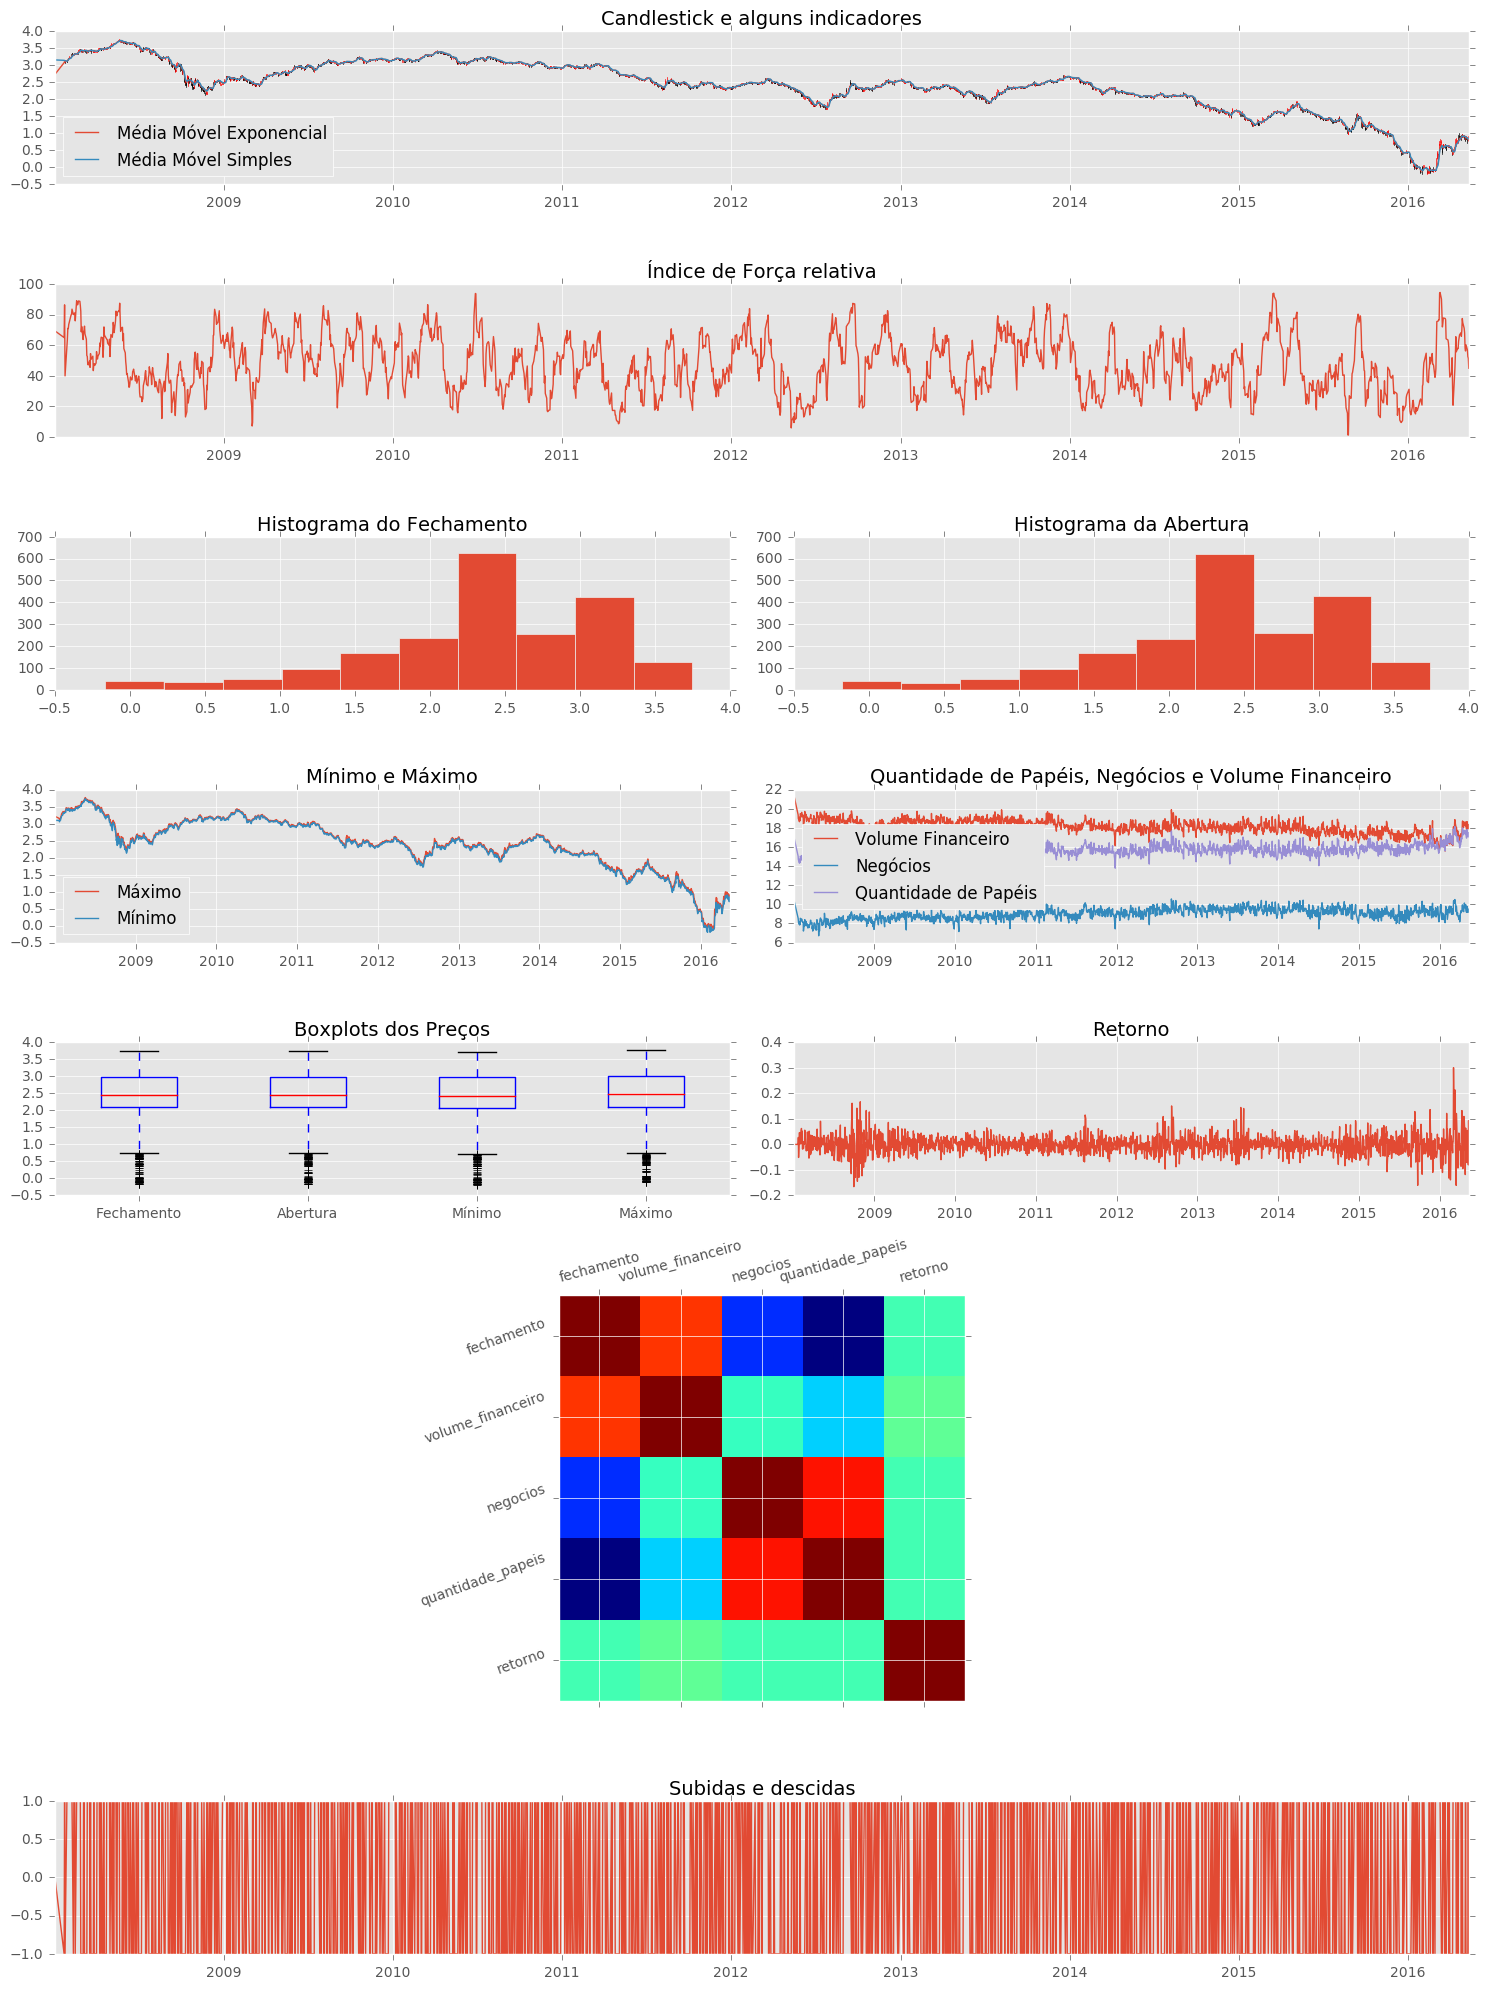

In [20]:
dataframe_visualizations(usiminas_normalizado, '20080102','20160512')

#### Últimos 6 meses

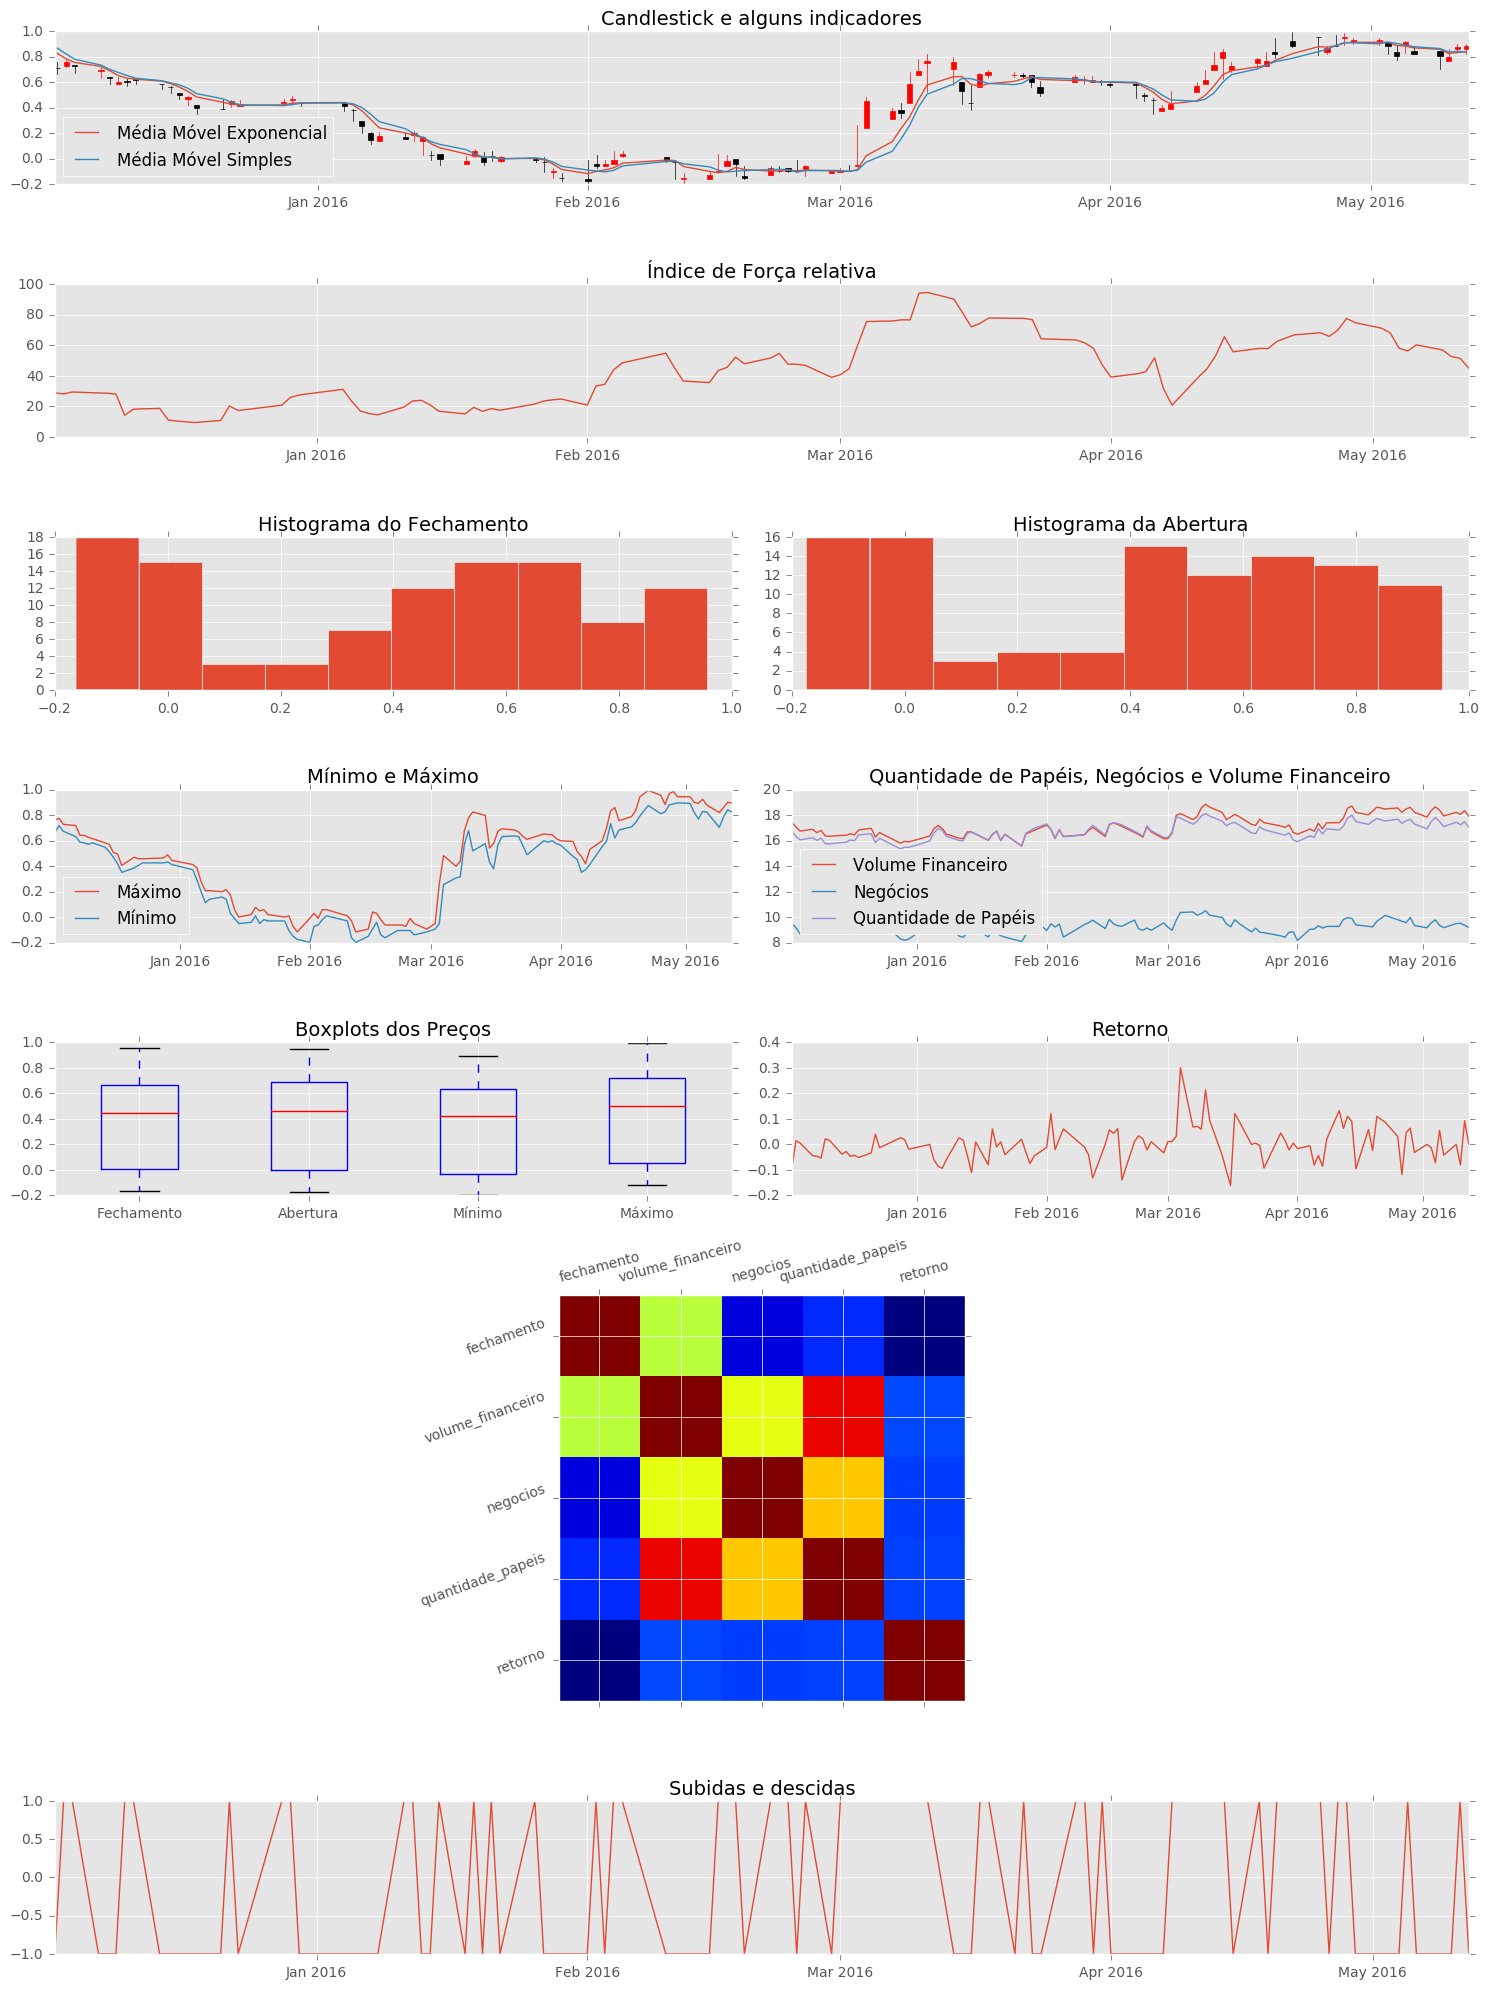

In [21]:
dataframe_visualizations(usiminas_normalizado, '20151202','20160512')

## Funções auxiliares:

A função <strong>group_by_day()</strong> recebe um dataframe de um dos ativos compartilhados pelo professor, com granularidade de 15 a 15 minutos e transforma em um dataframe com granularidade diária, pegando os valores máximos e mínimos de cada atributo, calculando também o retorno. Tudo em em escala logaritmica. 

In [3]:
def group_by_day(dataframe):
    dados = {'abertura': 0, 'minimo': 0, 'maximo': 0, 'fechamento_anterior': 0, 'negocios': 0,
             'quantidade_papeis': 0, 'volume_financeiro': 0, 'datahora': 0, 'dia': 0,
             'retorno': 0, 'fechamento': 0, 'subiu': 0, 'ema': 0, 'ema_close' : 0, 'sma': 0, 
             'sma_close': 0, 'rsi': 0, 'rsi_close': 0}
    dia_atual = None
    todos_dados = []
    ultimo_fechamento = 0
    janela_medias = 5
    janela_ifr = 14
    janela_dados = []
    for d in dataframe.iterrows():

        if not dia_atual:
            dia_atual = str(d[1][9])[6:8]
            
            dados['fechamento'], dados['abertura'], dados['maximo'], dados['minimo'] = d[1][1], d[1][2], d[1][3], d[1][4]
            dados['fechamento_anterior'], dados['negocios'], dados['quantidade_papeis'], dados['volume_financeiro'] = d[1][5], d[1][6], d[1][7], d[1][8]
            dados['datahora'], dados['dia'], dados['retorno'], dados['subiu'] = dt.datetime.strptime(str(d[1][9])[0:8], '%Y%m%d'), len(todos_dados), 0, 0
            
        elif  dia_atual != str(d[1][9])[6:8]:
            if len(janela_dados) >= janela_ifr - 1:
                dados['dia'] = len(todos_dados)
                if len(todos_dados) > 0:
                    dados['fechamento'] = ultimo_fechamento
                    dados['fechamento_anterior'] = todos_dados[-1][1]
                    dados['retorno'] = log(dados['fechamento']) - dados['fechamento_anterior']
                    janela_dados.append([log(dados['fechamento']), dados['retorno']])

                    #Olhando se o preço subiu, desceu ou ficou neutro comparado com anteriormente:
                    if log(dados['fechamento']) <= dados['fechamento_anterior']:
                        dados['subiu'] = -1
                    elif log(dados['fechamento']) > dados['fechamento_anterior']:
                        dados['subiu'] = 1

                else:
                    dados['fechamento'] = fechamento_atual
                    janela_dados.append([log(dados['fechamento']), log(fechamento_atual) - log(fechamento_anterior)])
                
                dados['ema'] = exponencial_moving_average(janela_dados[janela_ifr - janela_medias :], janela_medias, dados['ema'])
                dados['sma'] = simple_moving_average(janela_dados[janela_ifr - janela_medias :], janela_medias)
                dados['rsi'] = relative_strength_index(janela_dados, janela_ifr)
                
                # Tais variáveis serão usadas para ajudar o algoritmo de ML a identificar 
                # quando o preço está sobrevendido ou sobrecomprado
                if dados['fechamento'] > dados['ema']: dados['ema_close'] = 1
                else: dados['ema_close'] = -1
                
                if dados['fechamento'] > dados['sma']: dados['sma_close'] = 1
                else: dados['sma_close'] = -1
                    
                if  30.0 <= dados['rsi']: dados['rsi_close'] = -1
                elif  70.0 >= dados['rsi']: dados['rsi_close'] = 1
                else: dados['rsi_close'] = 0
                
                aux0 = [dados['abertura'], dados['fechamento'], dados['maximo'], dados['minimo'], 
                       dados['negocios'], dados['quantidade_papeis'], dados['volume_financeiro'],
                       dados['fechamento_anterior'], dados['retorno'], dados['subiu'], dados['dia'],  dados['datahora'],
                       dados['ema'], dados['ema_close'], dados['sma'], dados['sma_close'], dados['rsi'], dados['rsi_close']]

                aux1 = list(map(lambda x: 1 if x == 0 else x, aux0[:7])) + aux0[7:]

                todos_dados.append(list(map(log, aux1[:7])) + aux1[7:])
                #todos_dados.append(aux0)

                ultimo_fechamento = fechamento_atual

                dados['fechamento'], dados['abertura'], dados['maximo'], dados['minimo'] = d[1][1], d[1][2], d[1][3], d[1][4]
                dados['negocios'], dados['quantidade_papeis'], dados['volume_financeiro'] = d[1][6], d[1][7], d[1][8]
                dados['datahora'], dados['retorno'], dados['subiu'] = dt.datetime.strptime(str(d[1][9])[0:8], '%Y%m%d'), 0, 0
                janela_dados.pop(0)
            else:
                pos = lambda x: 1 if x == 0 else x
                janela_dados.append([log(fechamento_atual), log(fechamento_atual) - log(fechamento_anterior)])
        
        if dados['minimo'] > d[1][4]: dados['minimo'] = d[1][4]
        if dados['maximo'] < d[1][3]: dados['maximo'] = d[1][3]
        
        dados['negocios'] += d[1][6]
        dados['quantidade_papeis'] += d[1][7]
        dados['volume_financeiro'] += d[1][8]
        
        dia_atual = str(d[1][9])[6:8]
        fechamento_atual = d[1][1]
        fechamento_anterior = d[1][5]
                
    new_df = pd.DataFrame(todos_dados, columns=['abertura', 'fechamento', 'maximo', 'minimo','negocios', 
                                                'quantidade_papeis', 'volume_financeiro','fechamento_anterior',
                                               'retorno', 'subiu', 'dia', 'datahora', 'ema', 'ema_close', 'sma', 
                                                'sma_close', 'rsi', 'rsi_close'])
    new_df.index = new_df['datahora']
    del(todos_dados)
    return new_df

<p>Para podermos usar o dataframe como entrada para os algoritmos de previsão/classificação, temos que fazer uma ligeira mudança no dataframe padrão. Em cada linha do dataframe temos a coluna <strong>subiu</strong> que informa se o preço atual do ativo subiu em relação ao período anterior, é isso que queremos prever, com isso para cada linha vou substituir o <strong>subiu</strong> de uma determinada linha pelo valor futuro, que é a resposta que quero prever.</p>

In [4]:
def prevision_dataframe(dataframe):
    data = []
    for d in dataframe.iterrows():
        if len(data) > 0:
            data[-1][9] = d[1][9]
            data.append(d[1])
        else:
            data.append(d[1])
    # Como o último valor do dataframe eu não sei qual será a previsão dele, eu não o coloco no novo dataframe.
    new_df = pd.DataFrame(data[:-1], columns=['abertura', 'fechamento', 'maximo', 'minimo','negocios', 
                                                'quantidade_papeis', 'volume_financeiro','fechamento_anterior',
                                               'retorno', 'subiu', 'dia', 'datahora', 'ema', 'ema_close', 'sma', 
                                                'sma_close', 'rsi', 'rsi_close'])
    new_df.index = new_df['datahora']
    del(data)
    return new_df

A função <strong>dataframe_visualizations</strong> mostra os gráficos dos principais atributos de cada ativo, em um dado intervalo de tempo.

In [5]:
def dataframe_visualizations(dataframe, initial_time, final_time):
    temp = dataframe.loc[initial_time : final_time]
    fontsize = 14
    quotes = []
    for i in temp.iterrows():
        quotes.append((date2num(i[1][11]), i[1][0], i[1][1], i[1][2], i[1][3]))

    num_col = 6
    num_lin = 8
    
    fig = plt.figure(figsize=(15, 20))   
    main = plt.subplot2grid((num_lin,num_col),(0, 0),rowspan=1, colspan=num_col)
    candlestick_ochl(main, quotes, width=0.6)
    
    main.set_title('Candlestick e alguns indicadores', fontsize=fontsize)
    main.plot(temp['datahora'], temp['ema'], label='Média Móvel Exponencial')
    main.plot(temp['datahora'], temp['sma'], label='Média Móvel Simples')
    main.xaxis_date()
    main.legend(prop={'size':fontsize - 2}, loc="best")
    
    rel = plt.subplot2grid((num_lin,num_col),(1, 0),rowspan=1, colspan=num_col)
    rel.set_title('Índice de Força relativa', fontsize=fontsize)
    rel.plot(temp['datahora'], temp['rsi'], label='Índice de Força Relativa')
    
    hist_close = plt.subplot2grid((num_lin, num_col), (2,0), rowspan=1, colspan=3)
    hist_close.hist(x=temp['fechamento'])
    hist_close.set_title('Histograma do Fechamento', fontsize=fontsize)
    
    hist_open = plt.subplot2grid((num_lin, num_col), (2,3), rowspan=1, colspan=3)
    hist_open.hist(x=temp['abertura'])
    hist_open.set_title('Histograma da Abertura', fontsize=fontsize)
    
    max_min = plt.subplot2grid((num_lin, num_col), (3,0), rowspan=1, colspan=3)
    max_min.plot(temp['datahora'],temp['maximo'], label='Máximo')
    max_min.plot(temp['datahora'],temp['minimo'], label='Mínimo')
    max_min.set_title('Mínimo e Máximo', fontsize=fontsize)
    max_min.legend(prop={'size':fontsize - 2}, loc="best")
    
    qnt = plt.subplot2grid((num_lin, num_col), (3,3), rowspan=1, colspan=3)
    qnt.plot(temp['datahora'],temp['volume_financeiro'], label='Volume Financeiro')
    qnt.plot(temp['datahora'],temp['negocios'], label='Negócios')
    qnt.plot(temp['datahora'],temp['quantidade_papeis'], label='Quantidade de Papéis')
    qnt.set_title('Quantidade de Papéis, Negócios e Volume Financeiro', fontsize=fontsize)
    qnt.legend(prop={'size':fontsize - 2}, loc="best")
    
    boxplot = plt.subplot2grid((num_lin, num_col), (4, 0), rowspan=1, colspan=3)
    boxplot.boxplot(x=[temp['fechamento'], temp['abertura'], temp['minimo'], temp['maximo']], 
                      labels=['Fechamento', 'Abertura', 'Mínimo', 'Máximo'])
    boxplot.set_title('Boxplots dos Preços', fontsize=fontsize)
    
    retorno = plt.subplot2grid((num_lin, num_col), (4, 3), rowspan=1, colspan=3)
    retorno.plot(temp['datahora'],temp['retorno'])
    retorno.set_title('Retorno', fontsize=fontsize)
    
    corr = temp[['fechamento', 'volume_financeiro', 'negocios', 'quantidade_papeis', 'retorno']].corr()
    
    coor_fig =plt.subplot2grid((num_lin, num_col), (5, 0), rowspan=2, colspan=6)
    coor_fig.matshow(corr)
    coor_fig.set_xticklabels(['']+['fechamento', 'volume_financeiro', 'negocios', 'quantidade_papeis', 'retorno'], rotation=15)
    coor_fig.set_yticklabels(['']+['fechamento', 'volume_financeiro', 'negocios', 'quantidade_papeis', 'retorno'], rotation=20)
    
    osc = plt.subplot2grid((num_lin, num_col), (7, 0), rowspan=1, colspan=6)
    osc.plot(temp['datahora'],temp[['subiu']])
    osc.set_title('Subidas e descidas', fontsize=fontsize)

    plt.tight_layout()
    #plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

In [23]:
def visualizacoes_estrategias(dataframe):
    fontsize = 14
    num_col = 6
    num_lin = 7
    fig = plt.figure(figsize=(10, 10))   
        
    dinheiro = plt.subplot2grid((num_lin, num_col), (0, 0), rowspan=1, colspan=6)
    dinheiro.plot(dataframe['Dia'],dataframe['Dinheiro'])
    dinheiro.set_title('Dinheiro', fontsize=fontsize)
    
    dinheiro_acao = plt.subplot2grid((num_lin, num_col), (1, 0), rowspan=1, colspan=6)
    dinheiro_acao.plot(dataframe['Dia'],dataframe['Dinheiro_Acao'])
    dinheiro_acao.set_title('Dinheiro em Ação', fontsize=fontsize)
    
    qnt_acoes = plt.subplot2grid((num_lin, num_col), (2, 0), rowspan=1, colspan=6)
    qnt_acoes.plot(dataframe['Dia'],dataframe['Qnt_Acoes'])
    qnt_acoes.set_title('Quantidade de Ações', fontsize=fontsize)
    
    vendas = plt.subplot2grid((num_lin, num_col), (3, 0), rowspan=1, colspan=6)
    vendas.plot(dataframe['Dia'],dataframe['Vendas'])
    vendas.set_title('Quantidade de Vendas', fontsize=fontsize)
    
    compras = plt.subplot2grid((num_lin, num_col), (4, 0), rowspan=1, colspan=6)
    compras.plot(dataframe['Dia'],dataframe['Compras'])
    compras.set_title('Quantidade de Compras', fontsize=fontsize)
    
    acao_tomada = plt.subplot2grid((num_lin, num_col), (5, 0), rowspan=1, colspan=6)
    acao_tomada.plot(dataframe['Dia'],dataframe['Acao_Tomada'])
    acao_tomada.set_title('Ação Tomada', fontsize=fontsize)
    
    
    ['Dia', 'Dinheiro', 'Vendas', 'Compras', 'Qnt_Acoes', 'Acao_Tomada']
    plt.tight_layout()
    plt.show()

<p>Alguns indicadores serão implementados abaixo, juntamente com métodos auxiliares de ML.</p>

In [7]:
def exponencial_moving_average(data, window, p_ema):
    for d in data:
        a_ema = (d[0] - p_ema) * (2 / (window + 1)) + p_ema
        p_ema = a_ema
    return a_ema
    
def simple_moving_average(data, window):
    return sum([x[0] for x in data]) / window

def relative_strength_index(data, window):
    gains = list(filter(lambda x:  x > 0, [x[1] for x in data]))
    gain_mean = sum(gains) / window

    losses = list(filter(lambda x: x < 0, [x[1] for x in data]))
    losses_mean = sum(losses) / window
    
    rsi = 100 - (100 / (1 + (gain_mean / abs(losses_mean))))
    return rsi

def get_train_test(dataframe, percentual_train_size):
    # Regra de três básica para definir o tamanho em linhas do teste.
    train_size = percentual_train_size * dataframe.dia.max() / 100
    aux = dataframe.dia <= train_size
    train = dataframe[aux]
    
    aux = dataframe.dia > train_size
    test = dataframe[aux]
    return (train, test)

def select_florest_settings(train, tests):
    accuracy = 0
    settings = {}
    while accuracy < 60:
        n_estimators, max_depth, min_samples_split, min_samples_leaf = random.sample(range(1, 200), 10), random.sample(range(1, 200), 10),  random.sample(range(1, 200), 10),  random.sample(range(1, 200), 10)
        min_samples_split, max_leaf_nodes, random_state = random.sample(range(1, 200), 10), random.sample(range(2, 200), 10), random.sample(range(1, 200), 10)
        min_weight_fraction_leaf = random.sample(np.arange(0,0.55,0.05).tolist(), 10)
        for estimator in n_estimators:
            for depth in max_depth:
                for samples_split in min_samples_split:
                    for samples_leaf in min_samples_leaf:
                        for weight_fraction_leaf in min_weight_fraction_leaf:
                            for leaf_nodes in max_leaf_nodes:
                                for state in random_state:
                                    model= RandomForestClassifier(n_estimators=estimator, max_depth=depth,
                                                                 min_samples_split=samples_split, min_samples_leaf=samples_leaf,
                                                                 min_weight_fraction_leaf=weight_fraction_leaf, max_leaf_nodes=leaf_nodes,
                                                                 random_state=state, n_jobs=4)
                                    model.fit(train[['abertura', 'fechamento', 'maximo', 'minimo','negocios',
                                                    'quantidade_papeis', 'volume_financeiro','fechamento_anterior',
                                                    'retorno', 'ema', 'ema_close', 'sma','sma_close', 'rsi', 'rsi_close']].values, train['subiu'].values)
                                    predict_test = model.predict(test[['abertura', 'fechamento', 'maximo', 'minimo','negocios',
                                                                        'quantidade_papeis', 'volume_financeiro','fechamento_anterior',
                                                                        'retorno', 'ema', 'ema_close', 'sma','sma_close', 'rsi', 'rsi_close']].values)
                                    if metrics.accuracy_score(test['subiu'].values, predict_test) > accuracy:
                                        accuracy = metrics.accuracy_score(test['subiu'].values, predict_test)
                                        print(accuracy)
                                        settings = {'n_estimators': estimator, 'max_depth':depth, 'min_samples_split':samples_split,
                                                   'min_samples_leaf':samples_leaf, 'min_weight_fraction_leaf':weight_fraction_leaf,
                                                   'max_leaf_nodes':leaf_nodes, 'random_state': state}
                                        accuraces[accuracy] = settings
    return settings

def select_svm_settings(train, tests):
    kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
    degrees = range(1,11)
    cache_size = 1024
    accuracy = 0
    settings = {}
    aux = np.arange(0,100,0.5).tolist()
    while accuracy <= 60:
        gammas = random.sample(aux, 10)
        coef0s = random.sample(aux, 10)
        random_states = random.sample(range(1, 200), 10)
        for k in kernels:
            for d in degrees:
                for g in gammas:
                    for c in coef0s:
                        for r in random_states:
                            model = SVC(kernel=k, degree=d, cache_size=cache_size, coef0=c, random_state=r, gamma=g)
                            
                            model.fit(train[['abertura', 'fechamento', 'maximo', 'minimo','negocios',
                                                    'quantidade_papeis', 'volume_financeiro','fechamento_anterior',
                                                    'retorno', 'ema', 'ema_close', 'sma','sma_close', 'rsi', 'rsi_close']].values, train['subiu'].values)
                            predict_test = model.predict(test[['abertura', 'fechamento', 'maximo', 'minimo','negocios',
                                                                        'quantidade_papeis', 'volume_financeiro','fechamento_anterior',
                                                                        'retorno', 'ema', 'ema_close', 'sma','sma_close', 'rsi', 'rsi_close']].values)
                            if metrics.accuracy_score(test['subiu'].values, predict_test) > accuracy:
                                accuracy = metrics.accuracy_score(test['subiu'].values, predict_test)
                                print(accuracy)
                                settings = {'kernel': k, 'degree':d, 'gamma':g,
                                           'coef0':c, 'random_state':r}
                                accuraces[accuracy] = settings
                                print(settings)
                            
    return settings

def model_bench(trains, tests, model):
    model.fit(trains[['abertura', 'fechamento', 'maximo', 'minimo','negocios', 
                'quantidade_papeis', 'volume_financeiro','fechamento_anterior',
                'retorno', 'ema', 'ema_close', 'sma','sma_close', 'rsi', 'rsi_close']].values, trains['subiu'].values)

    predict_test = model.predict(tests[['abertura', 'fechamento', 'maximo', 'minimo','negocios', 
                    'quantidade_papeis', 'volume_financeiro','fechamento_anterior',
                    'retorno', 'ema', 'ema_close', 'sma','sma_close', 'rsi', 'rsi_close']].values)
    print("Acurácia Modelo:",metrics.accuracy_score(tests['subiu'].values, predict_test))

    print(metrics.confusion_matrix(tests['subiu'].values, predict_test, labels=[1,-1]))

    print(metrics.classification_report(tests['subiu'].values, predict_test, labels=[1,-1]))
    
def model_fit(train, model):
    model.fit(train[['abertura', 'fechamento', 'maximo', 'minimo','negocios', 
                'quantidade_papeis', 'volume_financeiro','fechamento_anterior',
                'retorno', 'ema', 'ema_close', 'sma','sma_close', 'rsi', 'rsi_close']].values, train['subiu'].values)

<h3>Estratégias</h3>

In [22]:
def estrategia1(dinheiro,teste, modelo):
    dinheiro_restante = dinheiro
    vendas = 0
    compras = 0
    qnt_acoes = 0
    historico = []
    for d in teste.iterrows():
        #-1 vendeu, 1 comprou, 0 nada
        acao_tomada = 0
        fechamento = d[1][1]
        previsao = modelo.predict([d[1][0], d[1][1], d[1][2], d[1][3], d[1][4], d[1][5], d[1][6], d[1][7],
                        d[1][8], d[1][12], d[1][13], d[1][14], d[1][15], d[1][16], d[1][17]])
        
        if (previsao == 1) and (dinheiro_restante > 0):
            acao_tomada = 1
            compras += 1
            
            # Gasto 1/3 do dinheiro:
            preco_acao = exp(fechamento)
            gasto = dinheiro_restante / 3
            dinheiro_restante -= gasto
            acoes_compradas = gasto / preco_acao
            qnt_acoes += acoes_compradas
        elif (previsao == -1) and (qnt_acoes > 0):
            acao_tomada = -1
            vendas += 1
            
            # Vendo 1/3 das ações:
            preco_acao = exp(fechamento)
            acoes_vendidas = qnt_acoes / 3
            qnt_acoes -= acoes_vendidas
            ganho = acoes_vendidas * preco_acao
            dinheiro_restante += ganho
        
        dinheiro_acao = exp(fechamento) * qnt_acoes
        #dia, dinheiro_restante, vendas, compras, qnt_acoes
        historico.append([d[1][11], dinheiro_restante, dinheiro_acao, vendas, compras, qnt_acoes, acao_tomada])
    new_df = pd.DataFrame(historico, columns=['Dia', 'Dinheiro', 'Dinheiro_Acao', 'Vendas', 'Compras', 'Qnt_Acoes', 'Acao_Tomada'])
    del(historico)
    return new_df

def estrategia2(dinheiro,teste, modelo):
    vendas = 0
    retornos_reais = 0
    
    dinheiro_historico = []
    retornos_historico = []
    for d in teste.iterrows():
        fechamento = d[1][1]
        retornos_reais = d[1][8]
        ema_close = d[1][13]
        sma_close = d[1][15]
        rsi_close = d[1][17]
        previsao = modelo.predict([d[1][0], d[1][1], d[1][2], d[1][3], d[1][4], d[1][5], d[1][6], d[1][7],
                        d[1][8], d[1][12], d[1][13], d[1][14], d[1][15], d[1][16], d[1][17]])
        print(previsao)

<h3>Machine Learning</h3>

<h4>Random Florest</h4>

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
random_florest_cemig = RandomForestClassifier()

<h4>SVM</h4>

In [24]:
from sklearn.svm import SVC
svm_cemig = SVC(kernel='linear')

<h3>Cemig</h3>

In [25]:
train_cemig = get_train_test(prevision_dataframe(cemig_normalizado), 66)[0]
test_cemig = get_train_test(prevision_dataframe(cemig_normalizado), 66)[1]

<h4>Teste com Random Florest</h4>

In [26]:
model_fit(train_cemig, random_florest_cemig)
model_bench(train_cemig, test_cemig, random_florest_cemig)

Acurácia Modelo: 0.567335243553
[[146 190]
 [112 250]]
             precision    recall  f1-score   support

          1       0.57      0.43      0.49       336
         -1       0.57      0.69      0.62       362

avg / total       0.57      0.57      0.56       698



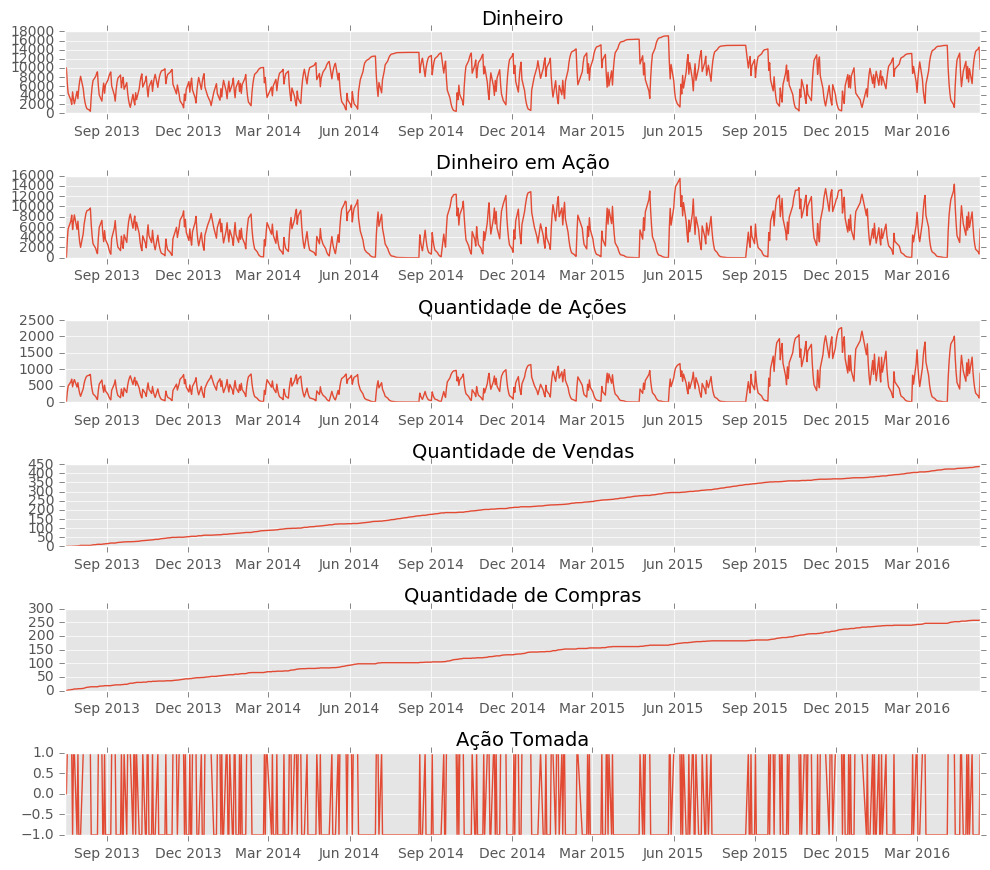

In [29]:
historico_cemig_random_florest = estrategia1(10000,test_cemig, random_florest_cemig)
visualizacoes_estrategias(historico_cemig_random_florest)

<h4>Teste com SVM</h4>

In [30]:
model_fit(train_cemig, svm_cemig)
model_bench(train_cemig, test_cemig, svm_cemig)

Acurácia Modelo: 0.597421203438
[[119 217]
 [ 64 298]]
             precision    recall  f1-score   support

          1       0.65      0.35      0.46       336
         -1       0.58      0.82      0.68       362

avg / total       0.61      0.60      0.57       698



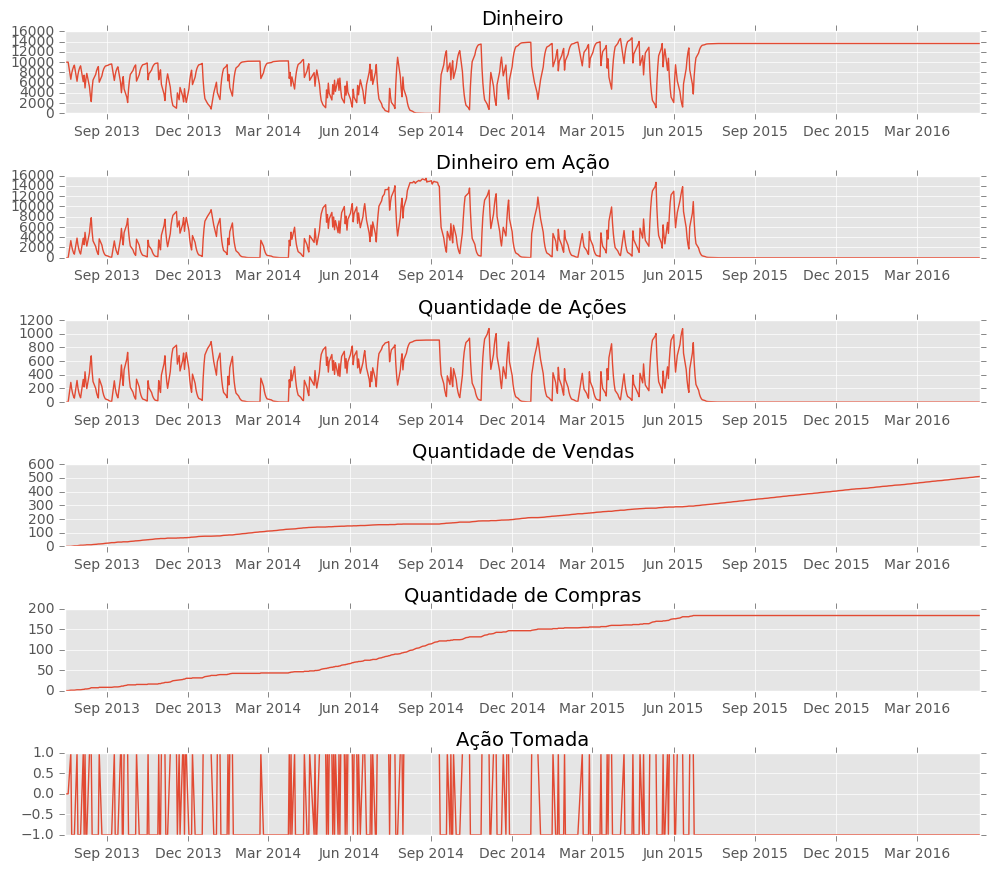

In [31]:
historico_cemig_svm = estrategia1(10000,test_cemig, svm_cemig)
visualizacoes_estrategias(historico_cemig_svm)

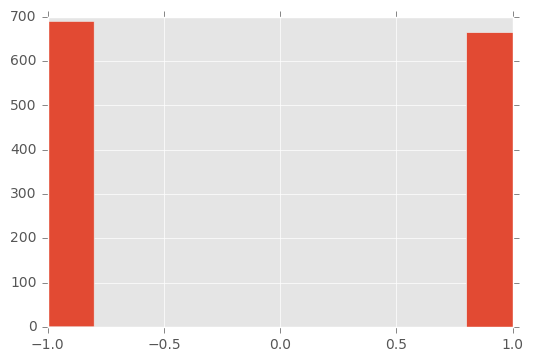

In [46]:
train_cemig.subiu.hist()
plt.show()

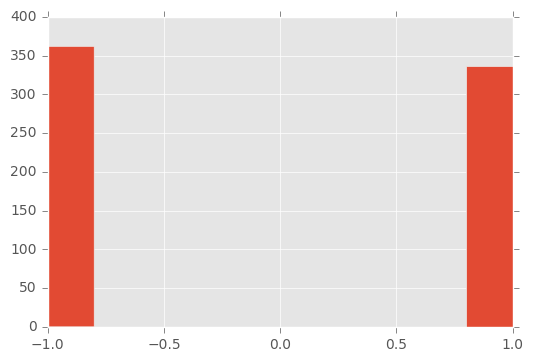

In [47]:
test_cemig.subiu.hist()
plt.show()

<h3>Embraer</h3>

In [32]:
train_embraer = get_train_test(prevision_dataframe(embraer_normalizado), 66)[0]
test_embraer = get_train_test(prevision_dataframe(embraer_normalizado), 66)[1]
random_florest_embraer = RandomForestClassifier()
model_fit(train_embraer, random_florest_embraer)
svm_embraer = SVC(kernel='linear')
model_fit(train_embraer, svm_embraer)

<h4>Teste com Random Florest</h4>

In [33]:
model_bench(train_embraer, test_embraer, random_florest_embraer)

Acurácia Modelo: 0.492836676218
[[200 142]
 [212 144]]
             precision    recall  f1-score   support

          1       0.49      0.58      0.53       342
         -1       0.50      0.40      0.45       356

avg / total       0.49      0.49      0.49       698



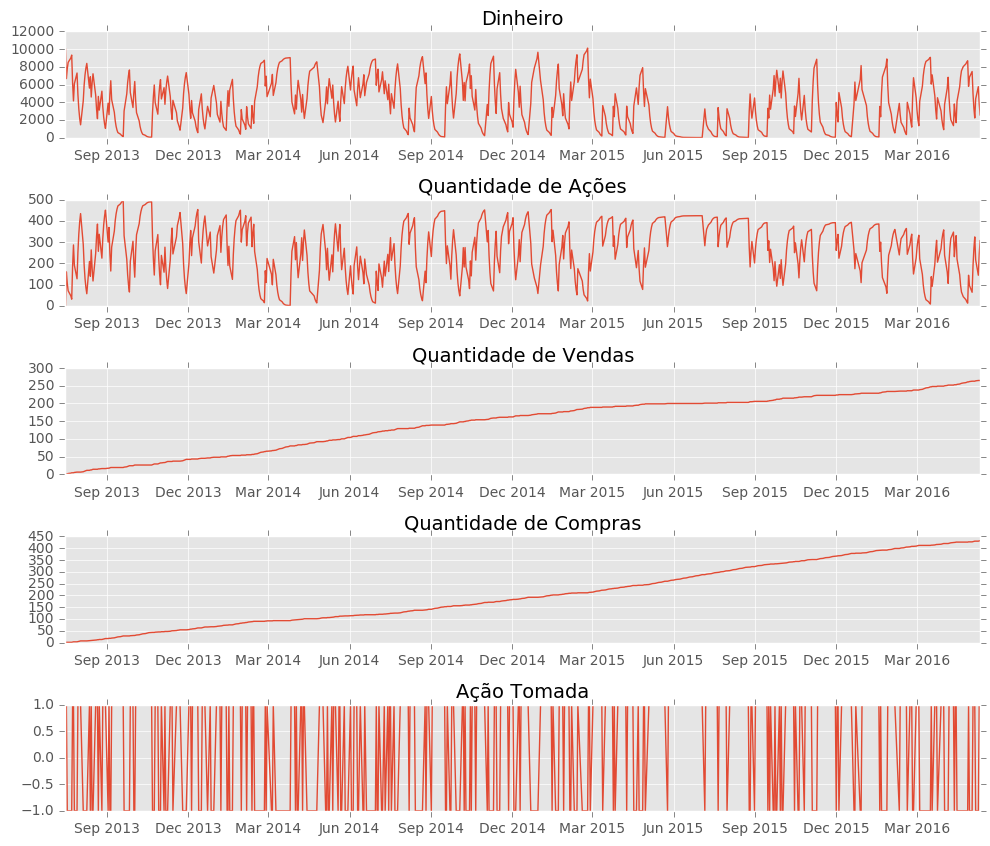

In [302]:
historico_embraer_random_florest  = estrategia1(10000,test_embraer, random_florest_embraer)
visualizacoes_estrategias(historico_embraer_random_florest)

<h4>Teste com SVM</h4>

In [34]:
model_bench(train_embraer, test_embraer, svm_embraer)

Acurácia Modelo: 0.542979942693
[[314  28]
 [291  65]]
             precision    recall  f1-score   support

          1       0.52      0.92      0.66       342
         -1       0.70      0.18      0.29       356

avg / total       0.61      0.54      0.47       698



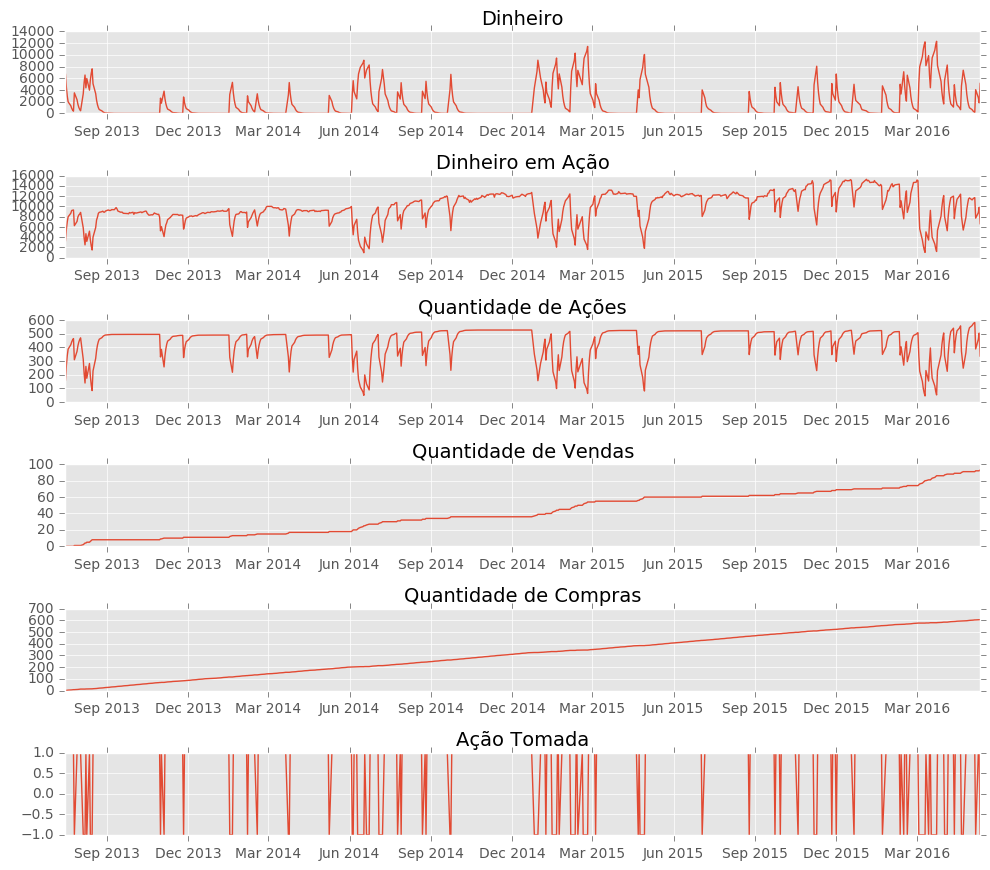

In [35]:
historico_embraer_svm = estrategia1(10000,test_embraer, svm_embraer)
visualizacoes_estrategias(historico_embraer_svm)

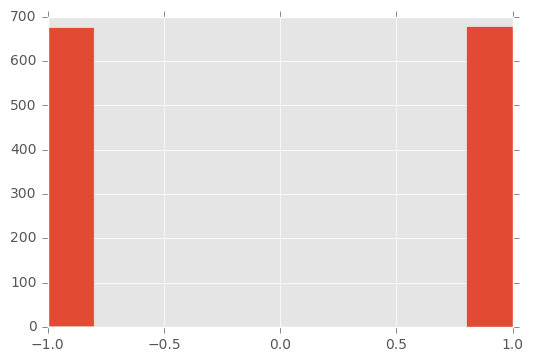

In [45]:
train_embraer.subiu.hist()
plt.show()

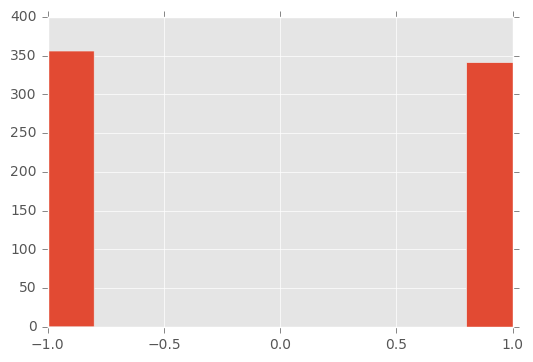

In [48]:
test_embraer.subiu.hist()
plt.show()

<h3>Usiminas</h3>

In [36]:
train_usiminas = get_train_test(prevision_dataframe(usiminas_normalizado), 66)[0]
test_usiminas = get_train_test(prevision_dataframe(usiminas_normalizado), 66)[1]
random_florest_usiminas = RandomForestClassifier()
model_fit(train_usiminas, random_florest_usiminas)
svm_usiminas = SVC(kernel='linear')
model_fit(train_usiminas, svm_usiminas)

<h4>Teste com Random Florest</h4>

In [37]:
model_bench(train_usiminas, test_usiminas, random_florest_usiminas)

Acurácia Modelo: 0.575931232092
[[138 172]
 [124 264]]
             precision    recall  f1-score   support

          1       0.53      0.45      0.48       310
         -1       0.61      0.68      0.64       388

avg / total       0.57      0.58      0.57       698



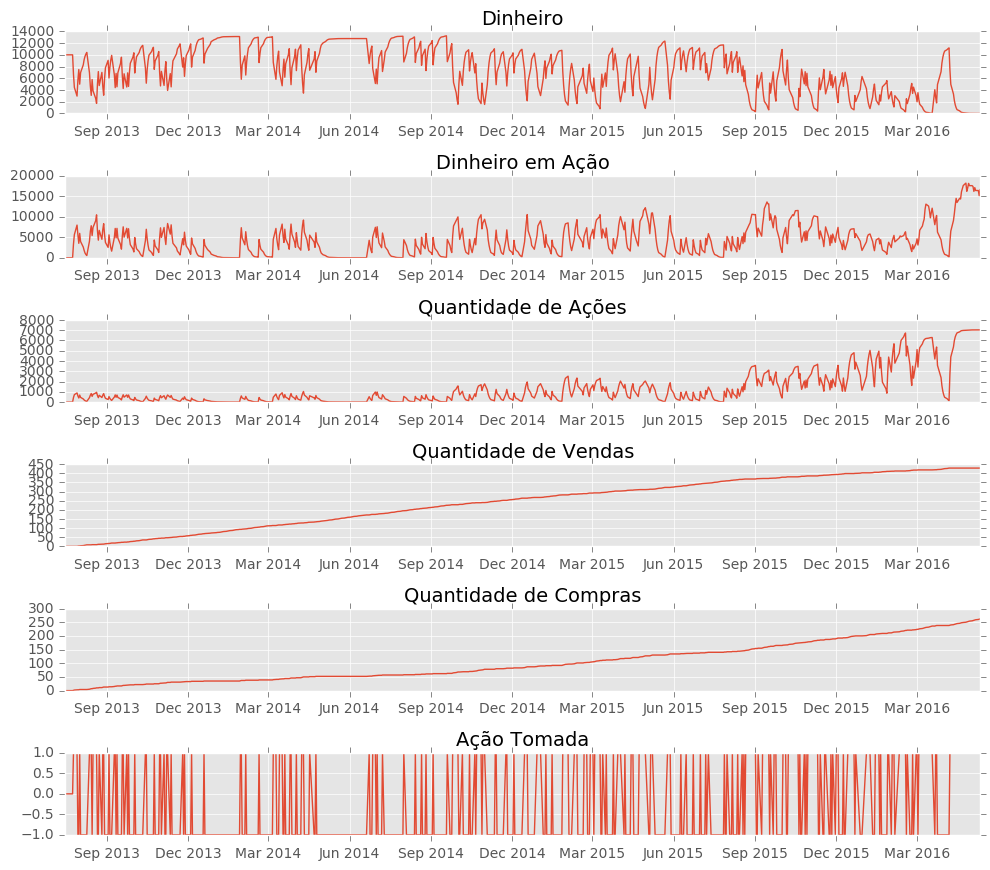

In [38]:
historico_usiminas_random_florest = estrategia1(10000,test_usiminas, random_florest_usiminas)
visualizacoes_estrategias(historico_usiminas_random_florest)

<h4>Teste com SVM</h4>

In [39]:
model_bench(train_usiminas, test_usiminas, svm_usiminas)

Acurácia Modelo: 0.661891117479
[[120 190]
 [ 46 342]]
             precision    recall  f1-score   support

          1       0.72      0.39      0.50       310
         -1       0.64      0.88      0.74       388

avg / total       0.68      0.66      0.64       698



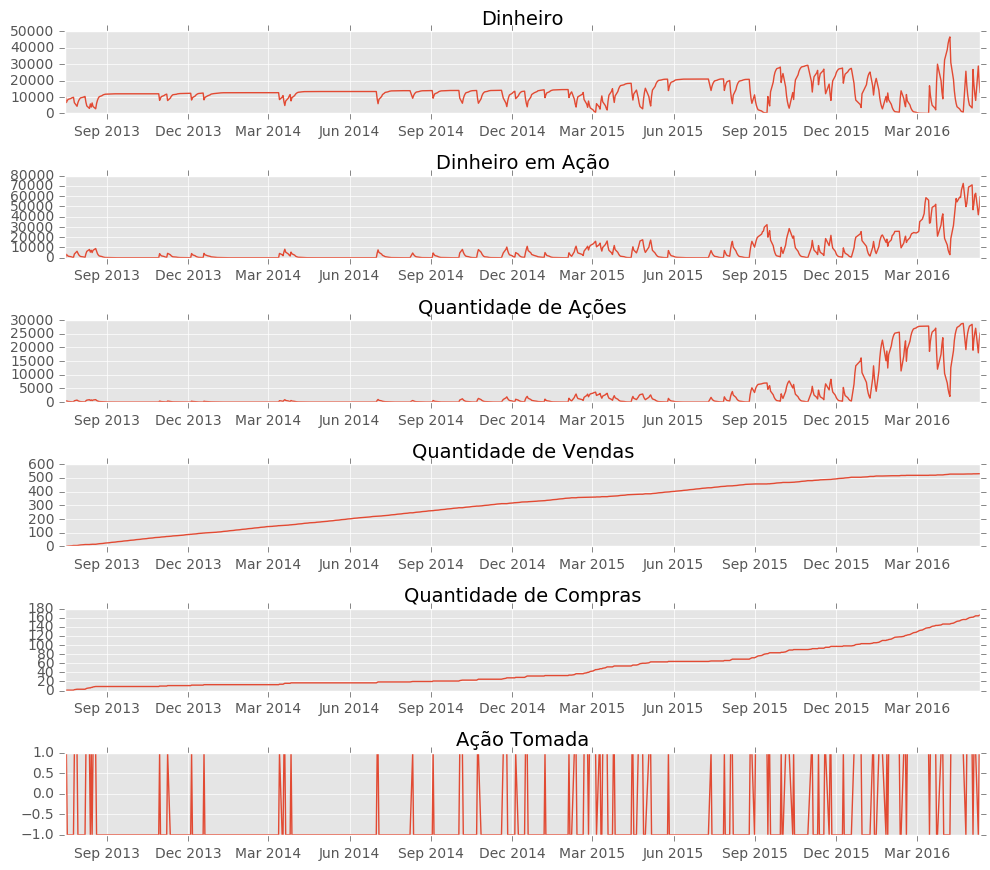

In [40]:
historico_usiminas_svm = estrategia1(10000,test_usiminas, svm_usiminas)
visualizacoes_estrategias(historico_usiminas_svm)

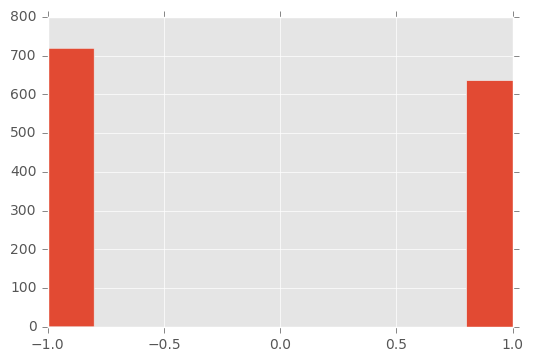

In [44]:
train_usiminas.subiu.hist()
plt.show()

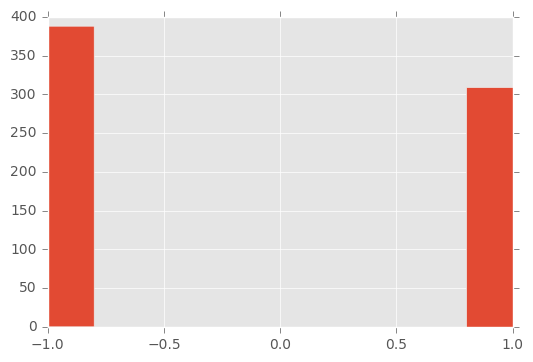

In [49]:
test_usiminas.subiu.hist()
plt.show()

<h2>Limbo</h2>
<p>Locais de códigos que podem ser reusados em outra hora.</p>

 '''
    close_neg = plt.subplot2grid((num_lin, num_col), (5, 0), rowspan=1, colspan=3)
    close_neg.scatter(temp['fechamento'],temp['soma_negocios'],  c=(0.8, 0.4745098039215686, 0.6549019607843137))
    close_neg.set_title('Fechamento X Negócios', fontsize=fontsize)
    
    close_vol = plt.subplot2grid((num_lin, num_col), (5, 3), rowspan=1, colspan=3)
    close_vol.scatter(temp['fechamento'],temp['soma_volume_financeiro'],  c=(0.8980392156862745, 0.6823529411764706, 0.2196078431372549))
    close_vol.set_title('Fechamento X Volume Financeiro', fontsize=fontsize)
    
    close_pap = plt.subplot2grid((num_lin, num_col), (6, 0), rowspan=1, colspan=3)
    close_pap.scatter(temp['fechamento'],temp['soma_quantidade_papeis'],  c=(0.8, 0.4745098039215686, 0.6549019607843137))
    close_pap.set_title('Fechamento X Quantidade de Papéis', fontsize=fontsize)
    
    close_ret = plt.subplot2grid((num_lin, num_col), (6, 3), rowspan=1, colspan=3)
    close_ret.scatter(temp['fechamento'],temp['retorno'],  c=(0.8980392156862745, 0.6823529411764706, 0.2196078431372549))
    close_ret.set_title('Fechamento X Retorno', fontsize=fontsize)
    '''

# Referências

http://www.portalaction.com.br/series-temporais/51-retornos

http://daltonvieira.com

http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators

http://scikit-learn.org/stable/index.html